# <font color='#197D75'> MD004 - Analisis de componentes principales </font>

In [32]:
library(tidyverse)
library(ggplot2)
library(GGally)
library(gridExtra)
library(corrplot)
library(caret)
library(lmtest)

### <font color='#197D75'>  0. Analisis de dominio y estrategia de modelizacion </font>

In [2]:
data = read.csv(file='C:/Users/Mateo/Documents/Mateo/Data Science - La Salle/MD004 - Herramientas para el análisis y visualización de datos/Trabajos Practicos/TP 6/20230119_DatosBoston.csv', header=TRUE, sep=';', dec='.')
str(data)

'data.frame':	506 obs. of  14 variables:
 $ crime_index       : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ urban_ratio       : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ industry_ratio    : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ c_river_variable  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox_concentration : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rooms_per_dwelling: num  6.58 6.42 7.18 7 7.15 ...
 $ dwelling_age      : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dwelling_dist     : num  4.09 49.67 49.67 60.62 60.62 ...
 $ highway_index     : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax_ratio         : int  296 242 242 222 222 222 311 311 311 311 ...
 $ teacher_ratio     : num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ racial_index      : num  397 397 393 395 397 ...
 $ lower_status      : num  4.98 9.14 4.03 2.94 5.33 ...
 $ median_value      : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [3]:
head(data[])

,crime_index,urban_ratio,industry_ratio,c_river_variable,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status,median_value
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.090,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,49.671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,49.671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,60.622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,60.622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,60.622,3,222,18.7,394.12,5.21,28.7


#### <font color='#197D75'>  1. Analisis de dominio </font>

####
El archivo 20230119_DatosBoston es una base de datos que nos suministra información detallada sobre el mercado de viviendas en Boston. Principalmente centrada en los precios medios de las viviendas (median_value), también incluye datos importantes sobre la criminalidad en la zona, la proporción de áreas urbanas residenciales, la presencia industrial, la proximidad a ríos, la concentración de óxido nitroso, el número promedio de habitaciones por vivienda, la edad promedio de las viviendas, la distancia ponderada a los centros urbanos, la accesibilidad a autopistas, tasas impositivas, ratios de alumnos por profesor, índices raciales y el porcentaje de población de clase baja. Estos datos sociodemográficos nos ofrecen una vision completa para comprender los factores que afectan a los precios de la vivienda en la region de Boston.

A lo largo de este trabajo intentaremos explicar de la forma mas precisa y consistente posible que factores determinan el precio medio de la vivienda. Para ello, comenzaremos analizando tanto estadisticamente como graficamente la composicion de nuestra base de datos.

In [4]:
summary(data)

  crime_index        urban_ratio     industry_ratio  c_river_variable 
 Min.   :  0.0063   Min.   :  0.00   Min.   : 0.46   Min.   :0.00000  
 1st Qu.:  0.0820   1st Qu.:  0.00   1st Qu.: 5.19   1st Qu.:0.00000  
 Median :  0.2565   Median :  0.00   Median : 9.69   Median :0.00000  
 Mean   :131.6957   Mean   : 11.36   Mean   :11.14   Mean   :0.06917  
 3rd Qu.:143.3370   3rd Qu.: 12.50   3rd Qu.:18.10   3rd Qu.:0.00000  
 Max.   :996.6540   Max.   :100.00   Max.   :27.74   Max.   :1.00000  
 nox_concentration rooms_per_dwelling  dwelling_age    dwelling_dist    
 Min.   :0.3850    Min.   :3.561      Min.   :  2.90   Min.   :  1.137  
 1st Qu.:0.4490    1st Qu.:5.886      1st Qu.: 45.02   1st Qu.: 17.930  
 Median :0.5380    Median :6.208      Median : 77.50   Median : 27.533  
 Mean   :0.5547    Mean   :6.285      Mean   : 68.57   Mean   : 33.837  
 3rd Qu.:0.6240    3rd Qu.:6.623      3rd Qu.: 94.08   3rd Qu.: 47.648  
 Max.   :0.8710    Max.   :8.780      Max.   :100.00   Max.   :12


- <font color='#197D75'>**crime_index:**</font> El índice de criminalidad varía desde un mínimo de 0.0063 hasta un máximo de 996.6540, con una media de 131.6957. La media y la mediana se encuentran extremadamente alejadas, lo que indica una gran asimetria hacia la derecha en esta distribucion.
- <font color='#197D75'>**urban_ratio:**</font> La proporción de zona urbana residencial sobre el total alcanza un máximo del 100%, con una media de 11.36. Aqui tambien vemos que la mediana se encuentra en 0, con lo cual podemos percibir cierta asimetria en la distribucion de esta variable. Hay mucha variabilidad, ya que el rango es total.
- <font color='#197D75'>**industry_ratio:**</font> El ratio de industria de la zona varía desde 0.46 hasta 27.74, con una media de 11.14.
- <font color='#197D75'>**c_river_variable:**</font> La variable c_river indica si la zona colinda con un río (1) o no (0), con una media de 0.06917. Esto nos indica que el 6,9% de las viviendas no son colindantes de un rio.
- <font color='#197D75'>**nox_concentration:**</font> La concentración de óxido nitroso en la zona tiene una media de 0.5547. Con una distribucion bastante simetrica, ya que la mediana toma un valor de 0.5380.
- <font color='#197D75'>**rooms_per_dwelling:**</font> El número medio de habitaciones por vivienda oscila entre 3.561 y 8.780, con una media de 6.285. Aca tambien encontramos una distribucion simetrica con una media y mediana muy similares.
- <font color='#197D75'>**dwelling_age:**</font> La "edad" media de las viviendas tiene una media de 68.57, con una mediana muy por encima, lo que indica una distribucion asimetrica a izquierda.
- <font color='#197D75'>**dwelling_dist:**</font> La distancia media ponderada con los centros urbanos varía desde 1.137 hasta 121.265, con una media de 33.837. Si bien la mediana se encuentra por debajo de la media, lo que es un indicio de cierta concentracion en los centros urbanos, esta concentracion no es tan alta. Viendo la distribucion de esta variable podemos imaginar que se trata de un lugar de alta concentracion demografica (un centro muy concentrado o varios centros concentrados y a poca distancia uno con el otro). Como la distribucion no es del todo simetrica, puedo sospechar que existe algun limite natural o artificial que no permite un desarrollo urbano simetrico. Podemos sospechar que el rio se encuentra relativamente cerca del centro. Sin embargo solamente el 7% de las viviendas viven colindando con el rio. Por otro lado, observamos que la variable urban_ratio tiene una mediana de 0%, existe mucha zona urbana que no es residencial. Nuestra sospecha inicial es que hay un rio bastante grande que cruza la ciudad y que pasa dentro de la zona urbana, solamente es una sospecha inicial luego investigaremos esto con mas profundidad.
- <font color='#197D75'>**highway_index:**</font> El índice de accesibilidad a autopistas cercanas varía desde 1 hasta 24, con una media de 9.549.
- <font color='#197D75'>**tax_ratio:**</font> El índice de tasas por cada 10000USD tiene una media de 408.2.
- <font color='#197D75'>**teacher_ratio:**</font> El ratio de alumno por profesor tiene una media de 18.46.
- <font color='#197D75'>**racial_index:**</font> El índice de proporción de población no caucásica tiene una media de 356.67.
- <font color='#197D75'>**lower_status:**</font> El porcentaje de población de "clase-baja" tiene una media de 12.65, la mediana es de aproximadamente 12, con lo cual hay una distribucion de riqueza entre zonas bastante pareja.

####
Veamos si nuestras variables cuentan con algunos valores nulos:

In [5]:
sapply(data, function(x) sum(is.na(x)))

crime_index        urban_ratio     industry_ratio   c_river_variable 
                 0                  0                  0                  0 
 nox_concentration rooms_per_dwelling       dwelling_age      dwelling_dist 
                 0                  0                  0                  0 
     highway_index          tax_ratio      teacher_ratio       racial_index 
                 0                  0                  0                  0 
      lower_status       median_value 
                 0                  0

####
No hay valores nulos en ninguna de nuestras variables.

#### <font color='#197D75'> Analisis grafico: </font>

Veamos como se dan las distribuciones de nuestras variables en un histograma para cada una de ellas:

Warning message:
"`aes_string()` was deprecated in ggplot2 3.0.0.
i Please use tidy evaluation idioms with `aes()`.
i See also `vignette("ggplot2-in-packages")` for more information."


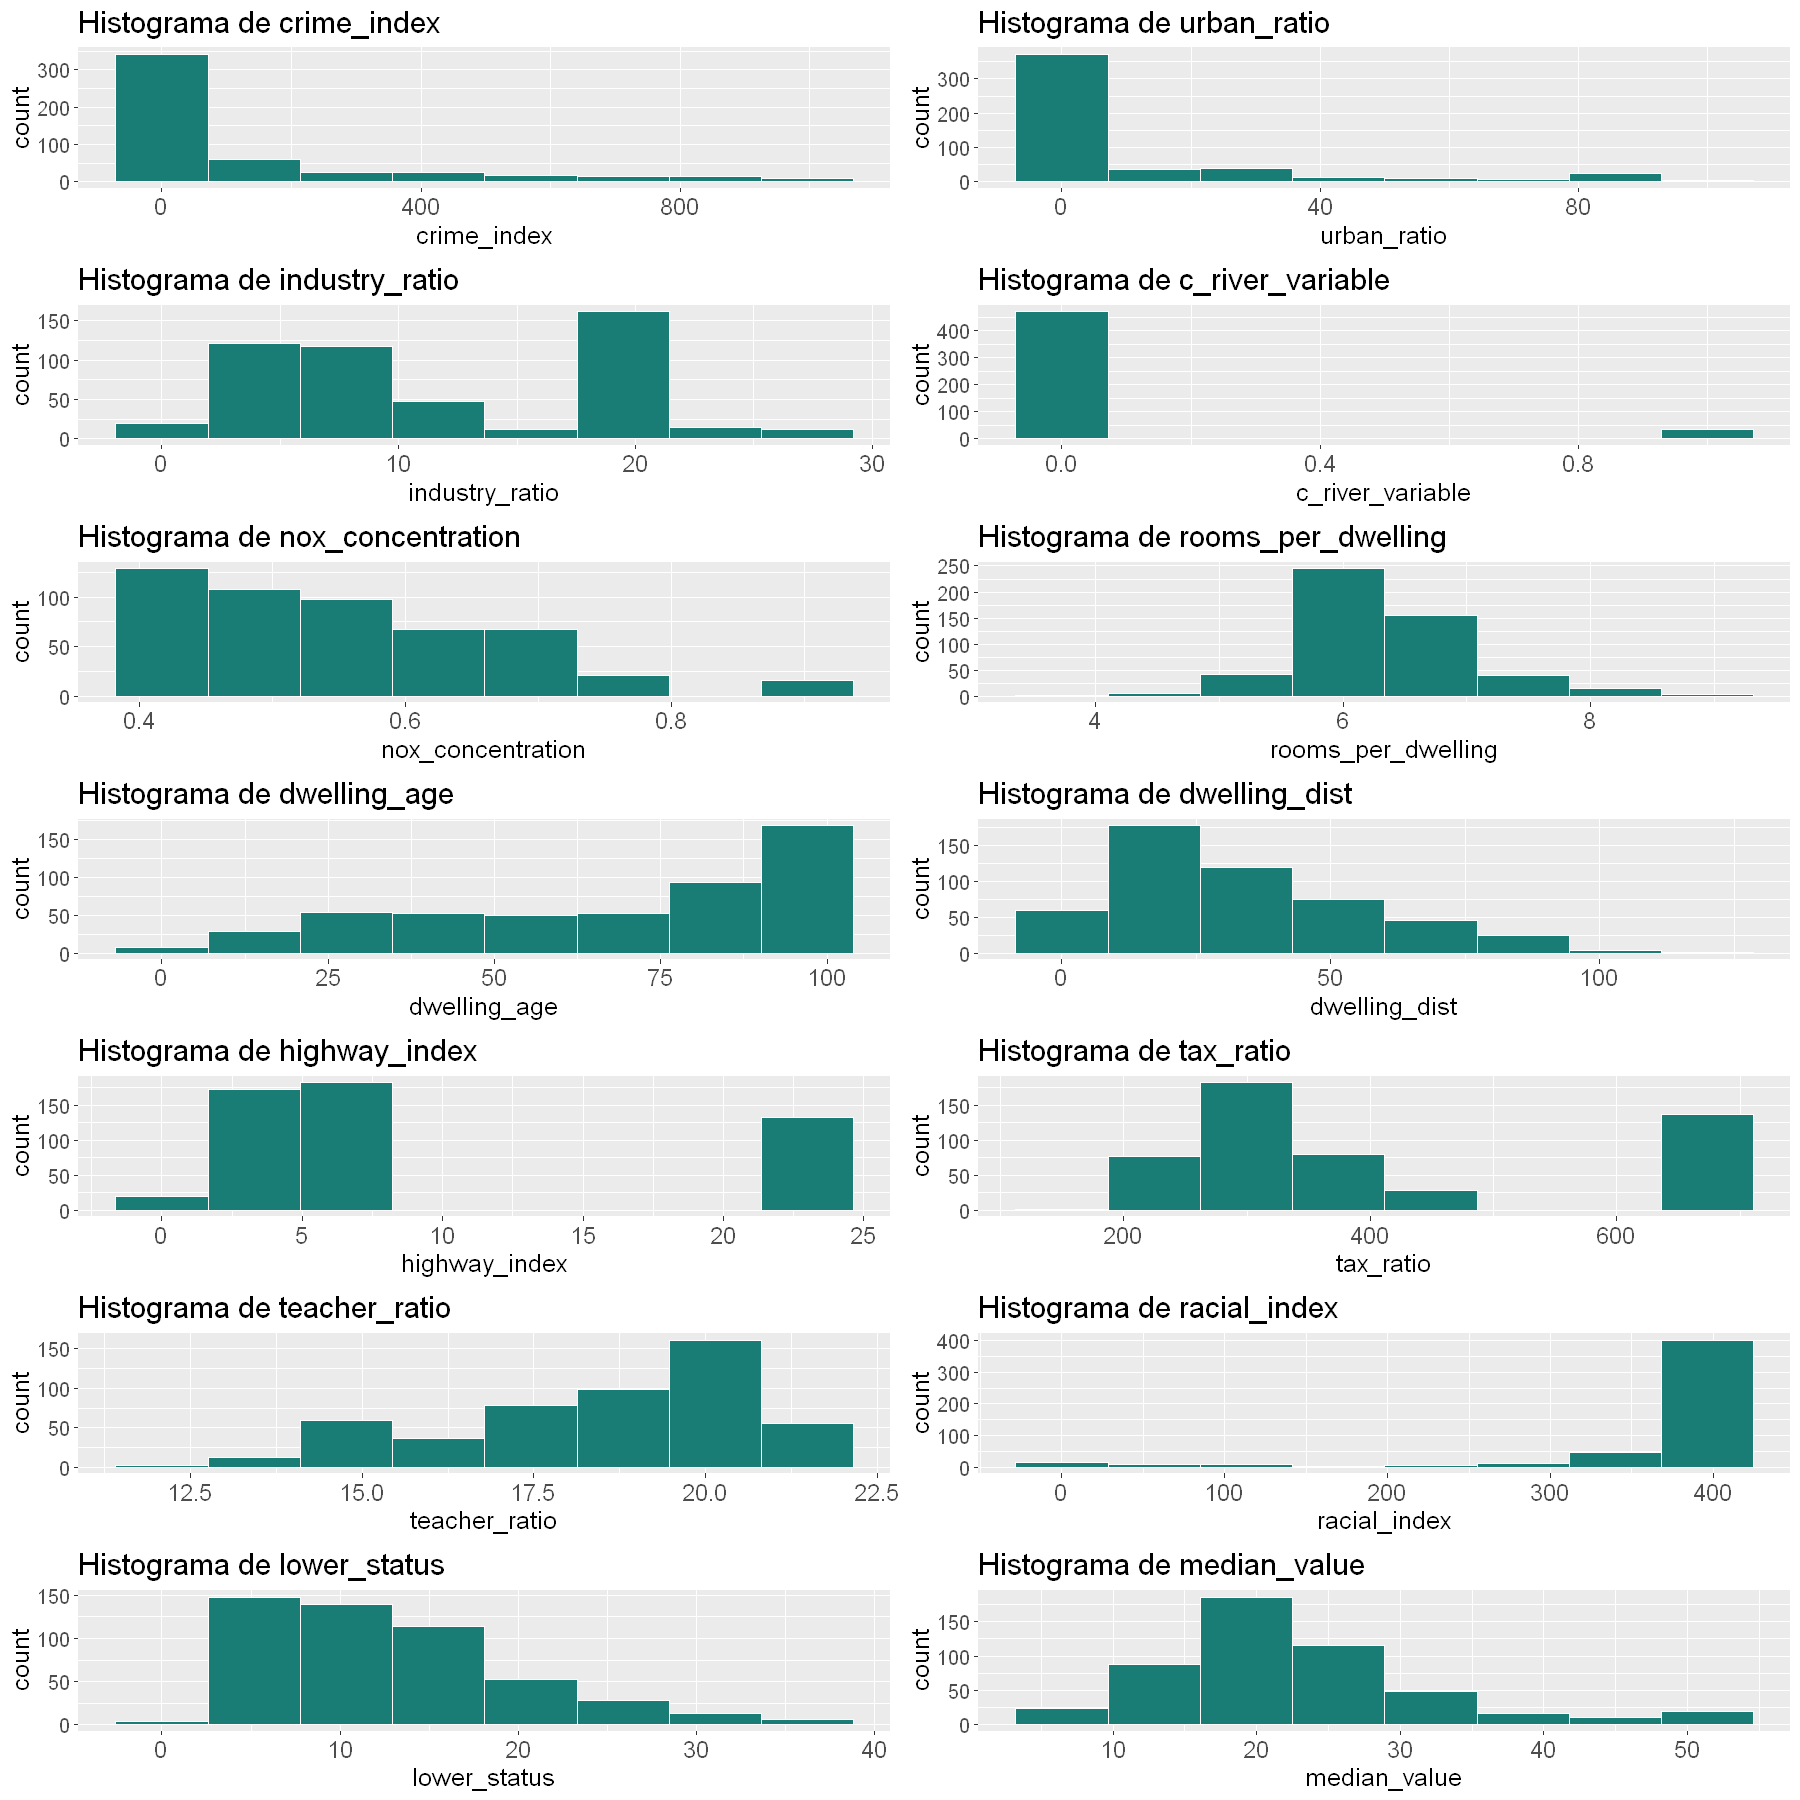

In [6]:
graficos_histograma = list()
graficos_boxplot = list()
variables <- c('crime_index', 'urban_ratio', 'industry_ratio', 'c_river_variable', 'nox_concentration', 'rooms_per_dwelling', 'dwelling_age', 'dwelling_dist', 'highway_index', 'tax_ratio', 'teacher_ratio', 'racial_index', 'lower_status', 'median_value')
subconjunto_data2 <- data[, variables, drop = FALSE]

options(
  repr.plot.width = 13,  
  repr.plot.height = 8 
)


# Histogramas

for (variable in variables) {
  grafico = ggplot(subconjunto_data2) +
    aes_string(x = variable) +
    geom_histogram(bins = 8, fill = '#197D75', color = 'white', na.rm = TRUE) +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Histograma de", variable))
  
  graficos_histograma[[length(graficos_histograma) + 1]] <- grafico
}

options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los histogramas en un grid
do.call('grid.arrange', c(graficos_histograma, ncol = 2))


####
Observamos que todas las variables toman una forma descripta por los estadisticos visto mas arriba. Veamos como afectan los outliers a nuestra distribucion a traves de los graficos de boxplot y qqplot:

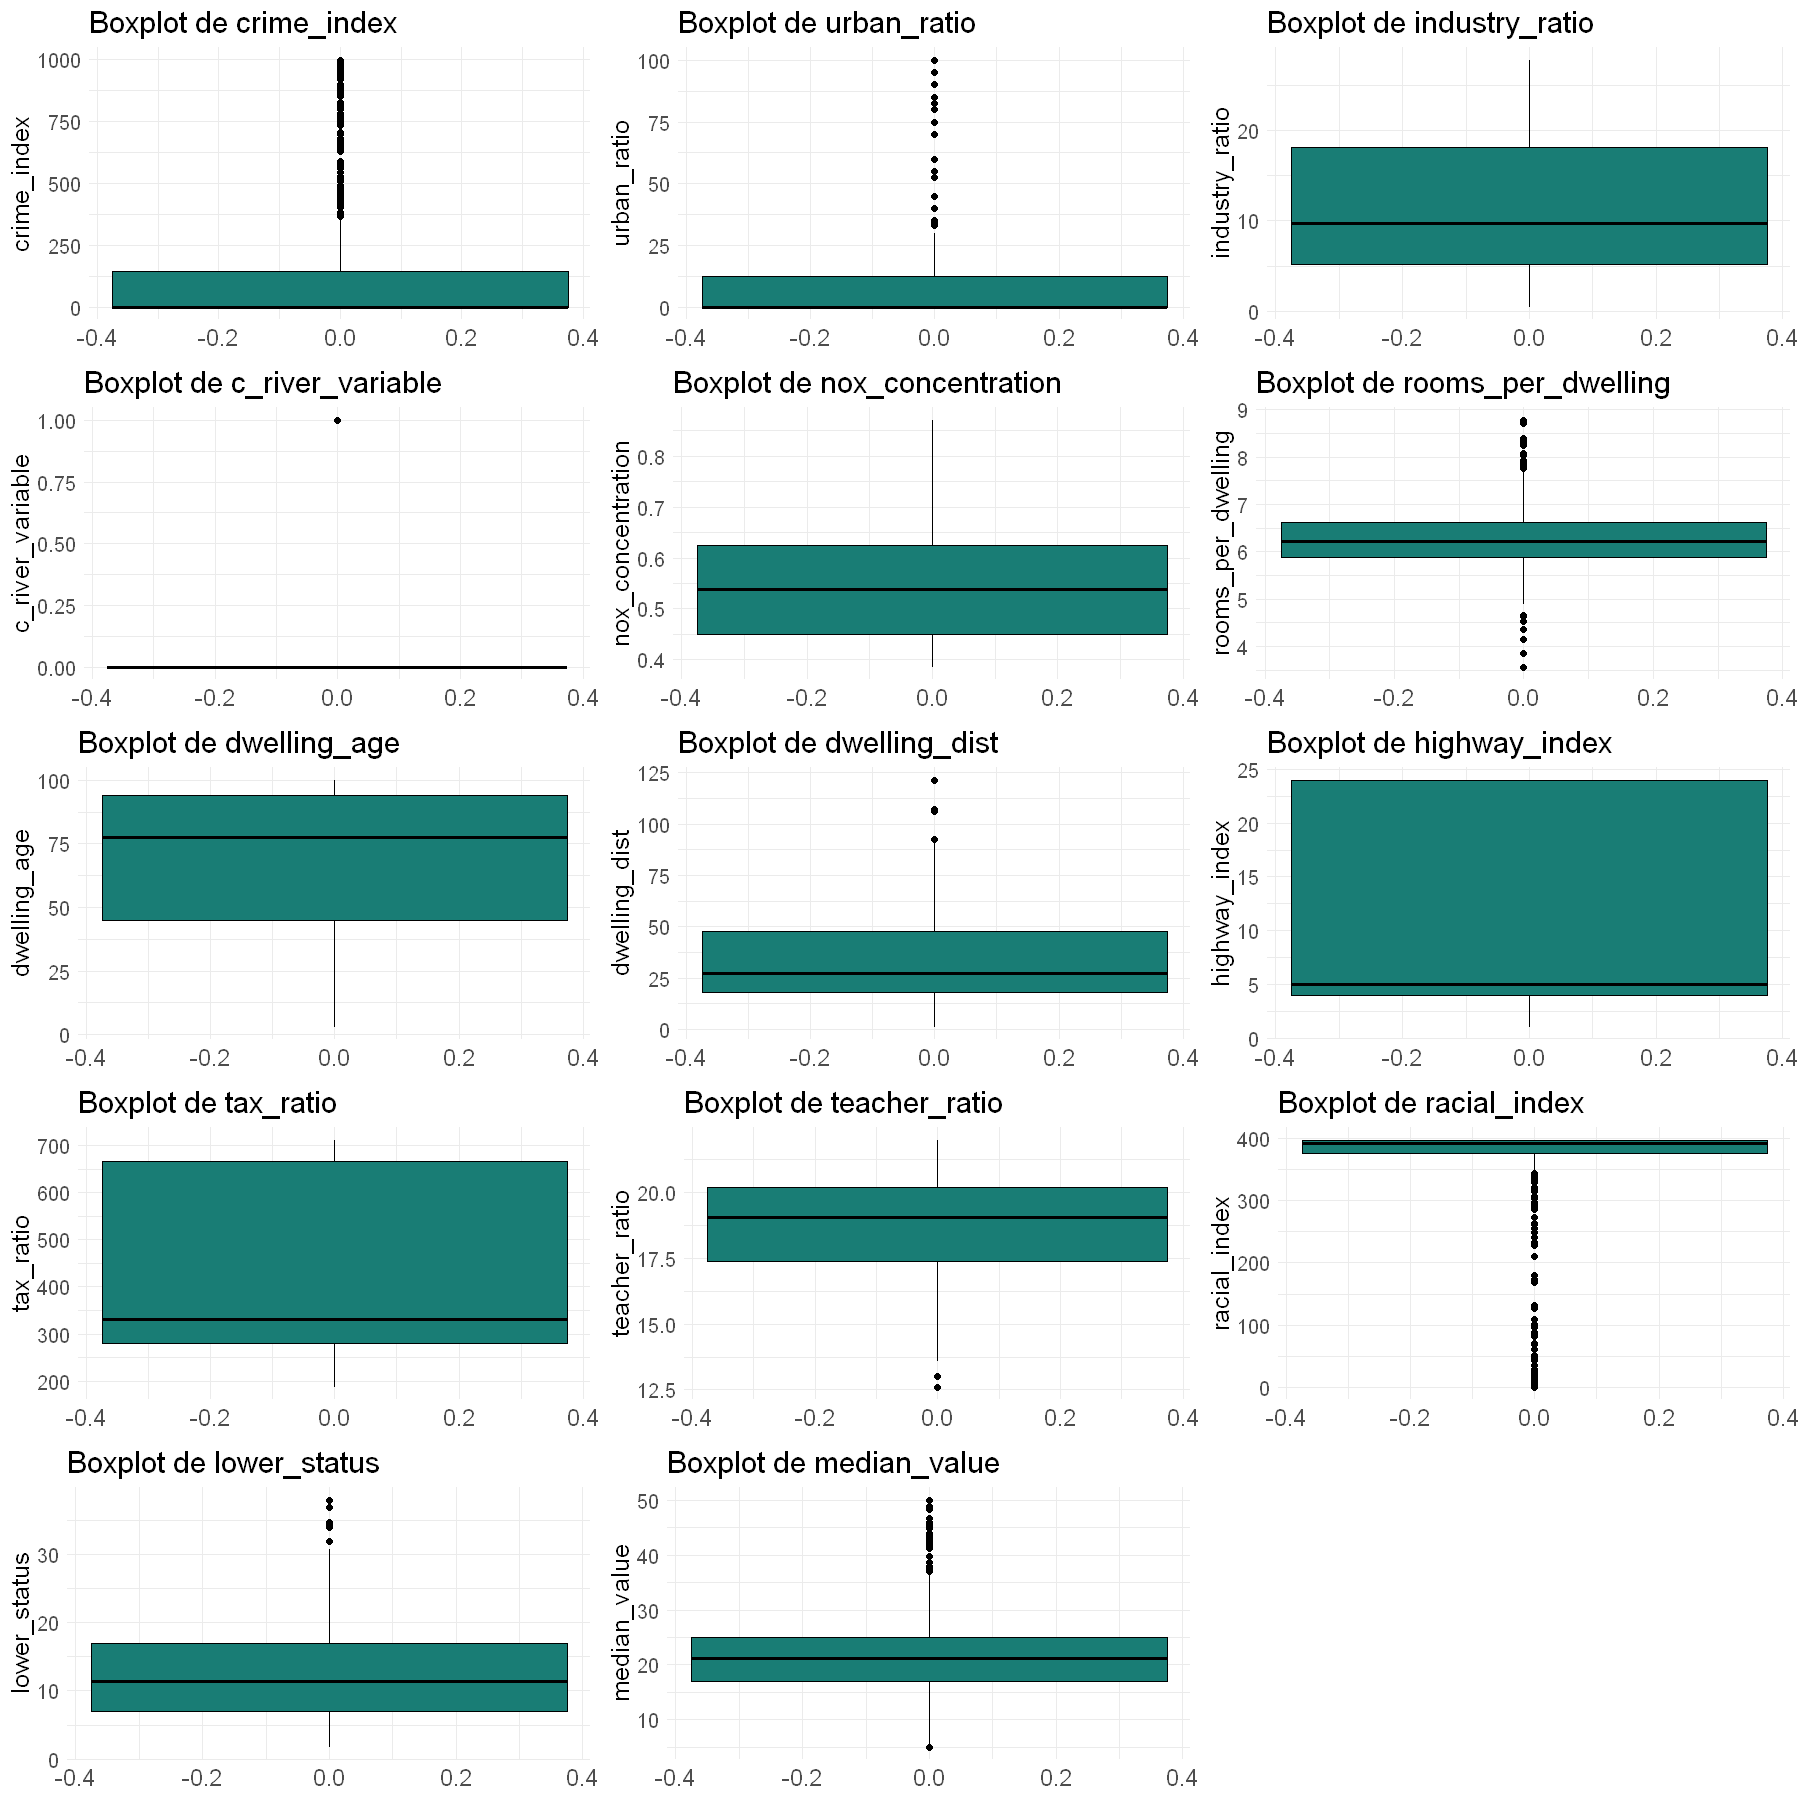

In [7]:
# Iterar sobre cada variable y crear un boxplot
for (variable in variables) {
  grafico <- ggplot(subconjunto_data2, aes_string(y = variable)) +
    geom_boxplot(fill = '#197D75', color = 'black') +
    theme_minimal() +
    theme(text = element_text(size = 15), axis.text.x = element_text(size = 14)) + 
    labs(title = paste("Boxplot de", variable))
  
  # Agregar el gráfico a la lista
  graficos_boxplot[[length(graficos_boxplot) + 1]] <- grafico
}

# Configurar el tamaño de los gráficos
options(
  repr.plot.width = 15,  
  repr.plot.height = 15  
)

# Mostrar los boxplots en un grid
do.call('grid.arrange', c(graficos_boxplot, ncol = 3))

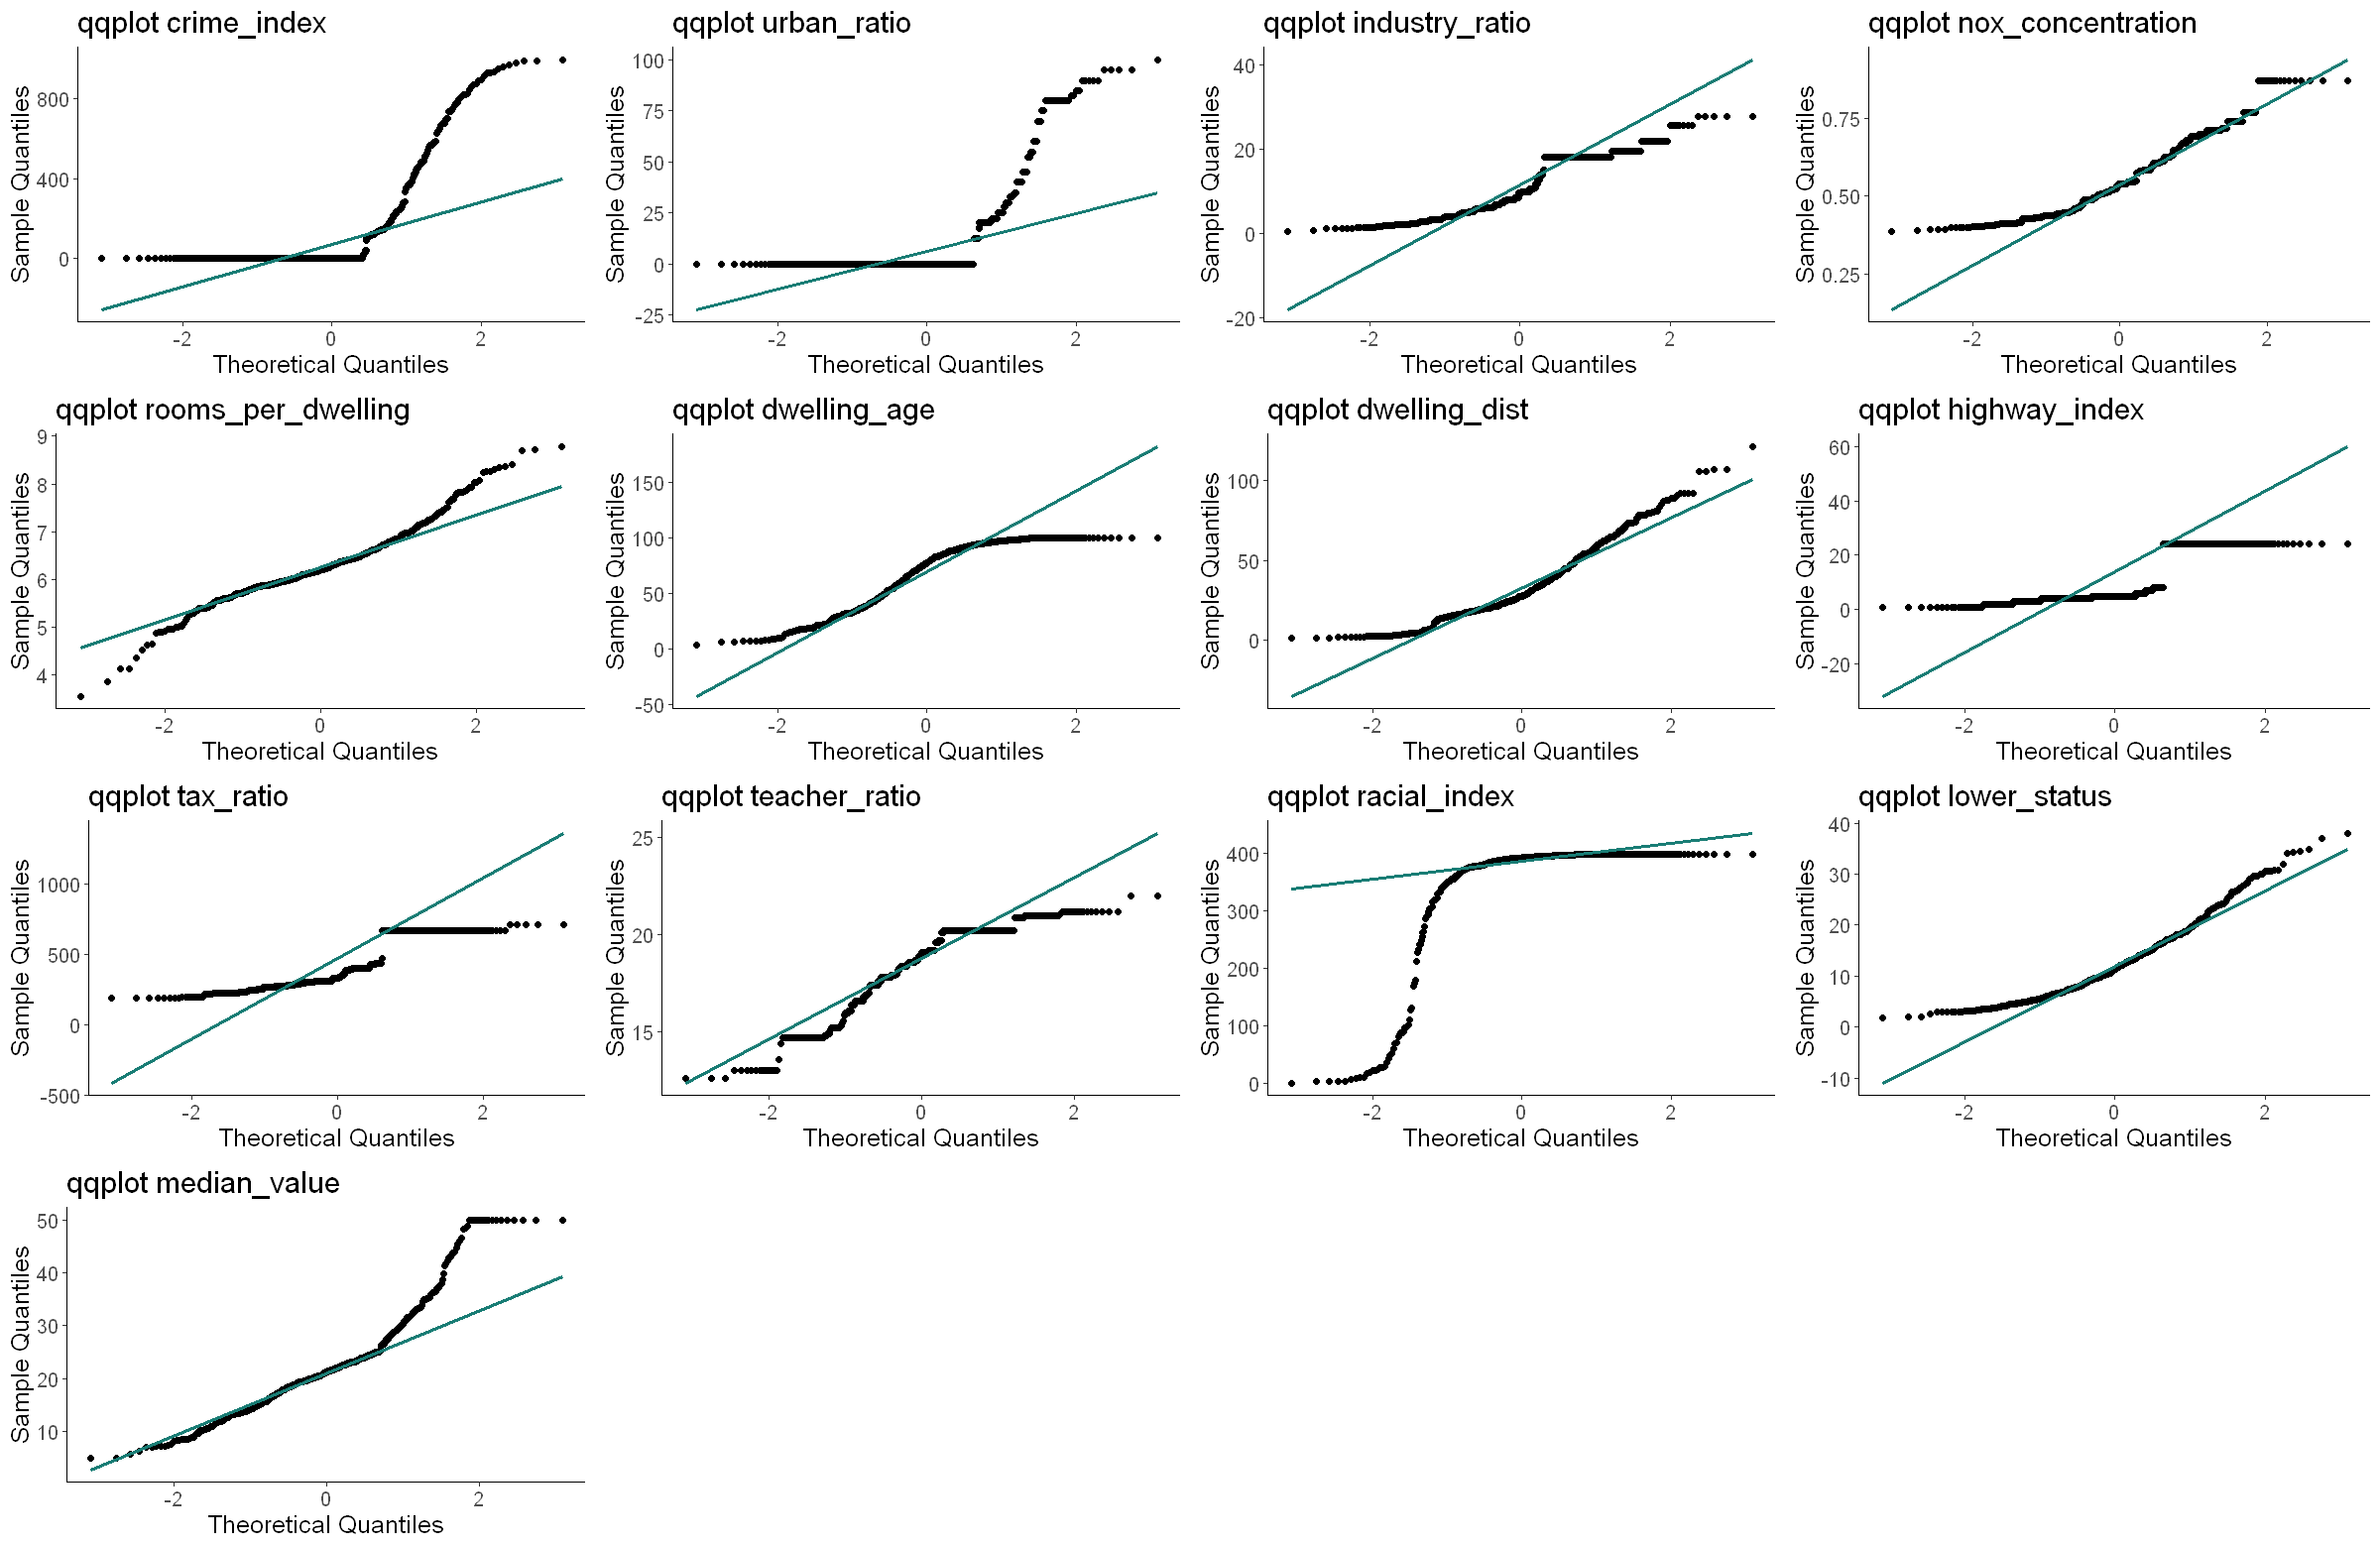

In [8]:
options(
  repr.plot.width = 20,  
  repr.plot.height = 13 
)

qq_plots = list()
var_data <- c('crime_index','urban_ratio','industry_ratio','nox_concentration','rooms_per_dwelling','dwelling_age','dwelling_dist','highway_index','tax_ratio','teacher_ratio','racial_index','lower_status','median_value')


for (i in seq_along(var_data)) {
  variable = var_data[i]
  qq_plot = ggplot(data[!is.na(data[[variable]]), ],aes(sample = !!sym(variable))) +
    stat_qq() +
    stat_qq_line(color ='#197D75', lwd = 1) +
    labs(title = paste('qqplot', variable),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  qq_plots[[i]] = qq_plot
}

grid.arrange(grobs = qq_plots, ncol = 4, widths = rep(2, 4))

####
Ninguna de nuestras variables independientes parece tener una distribucion normal perfecta. Si bien hay algunas que pueden aproximarse a una distribucion normal, como por ejemplo 'dwelling_list' y 'lower_status'. Esto es importante considerarlo para cuando hagamos implicaciones estadisticas en nuestro modelo de regresion. Ahora, observemos particularmente nuestra variable objetivo:

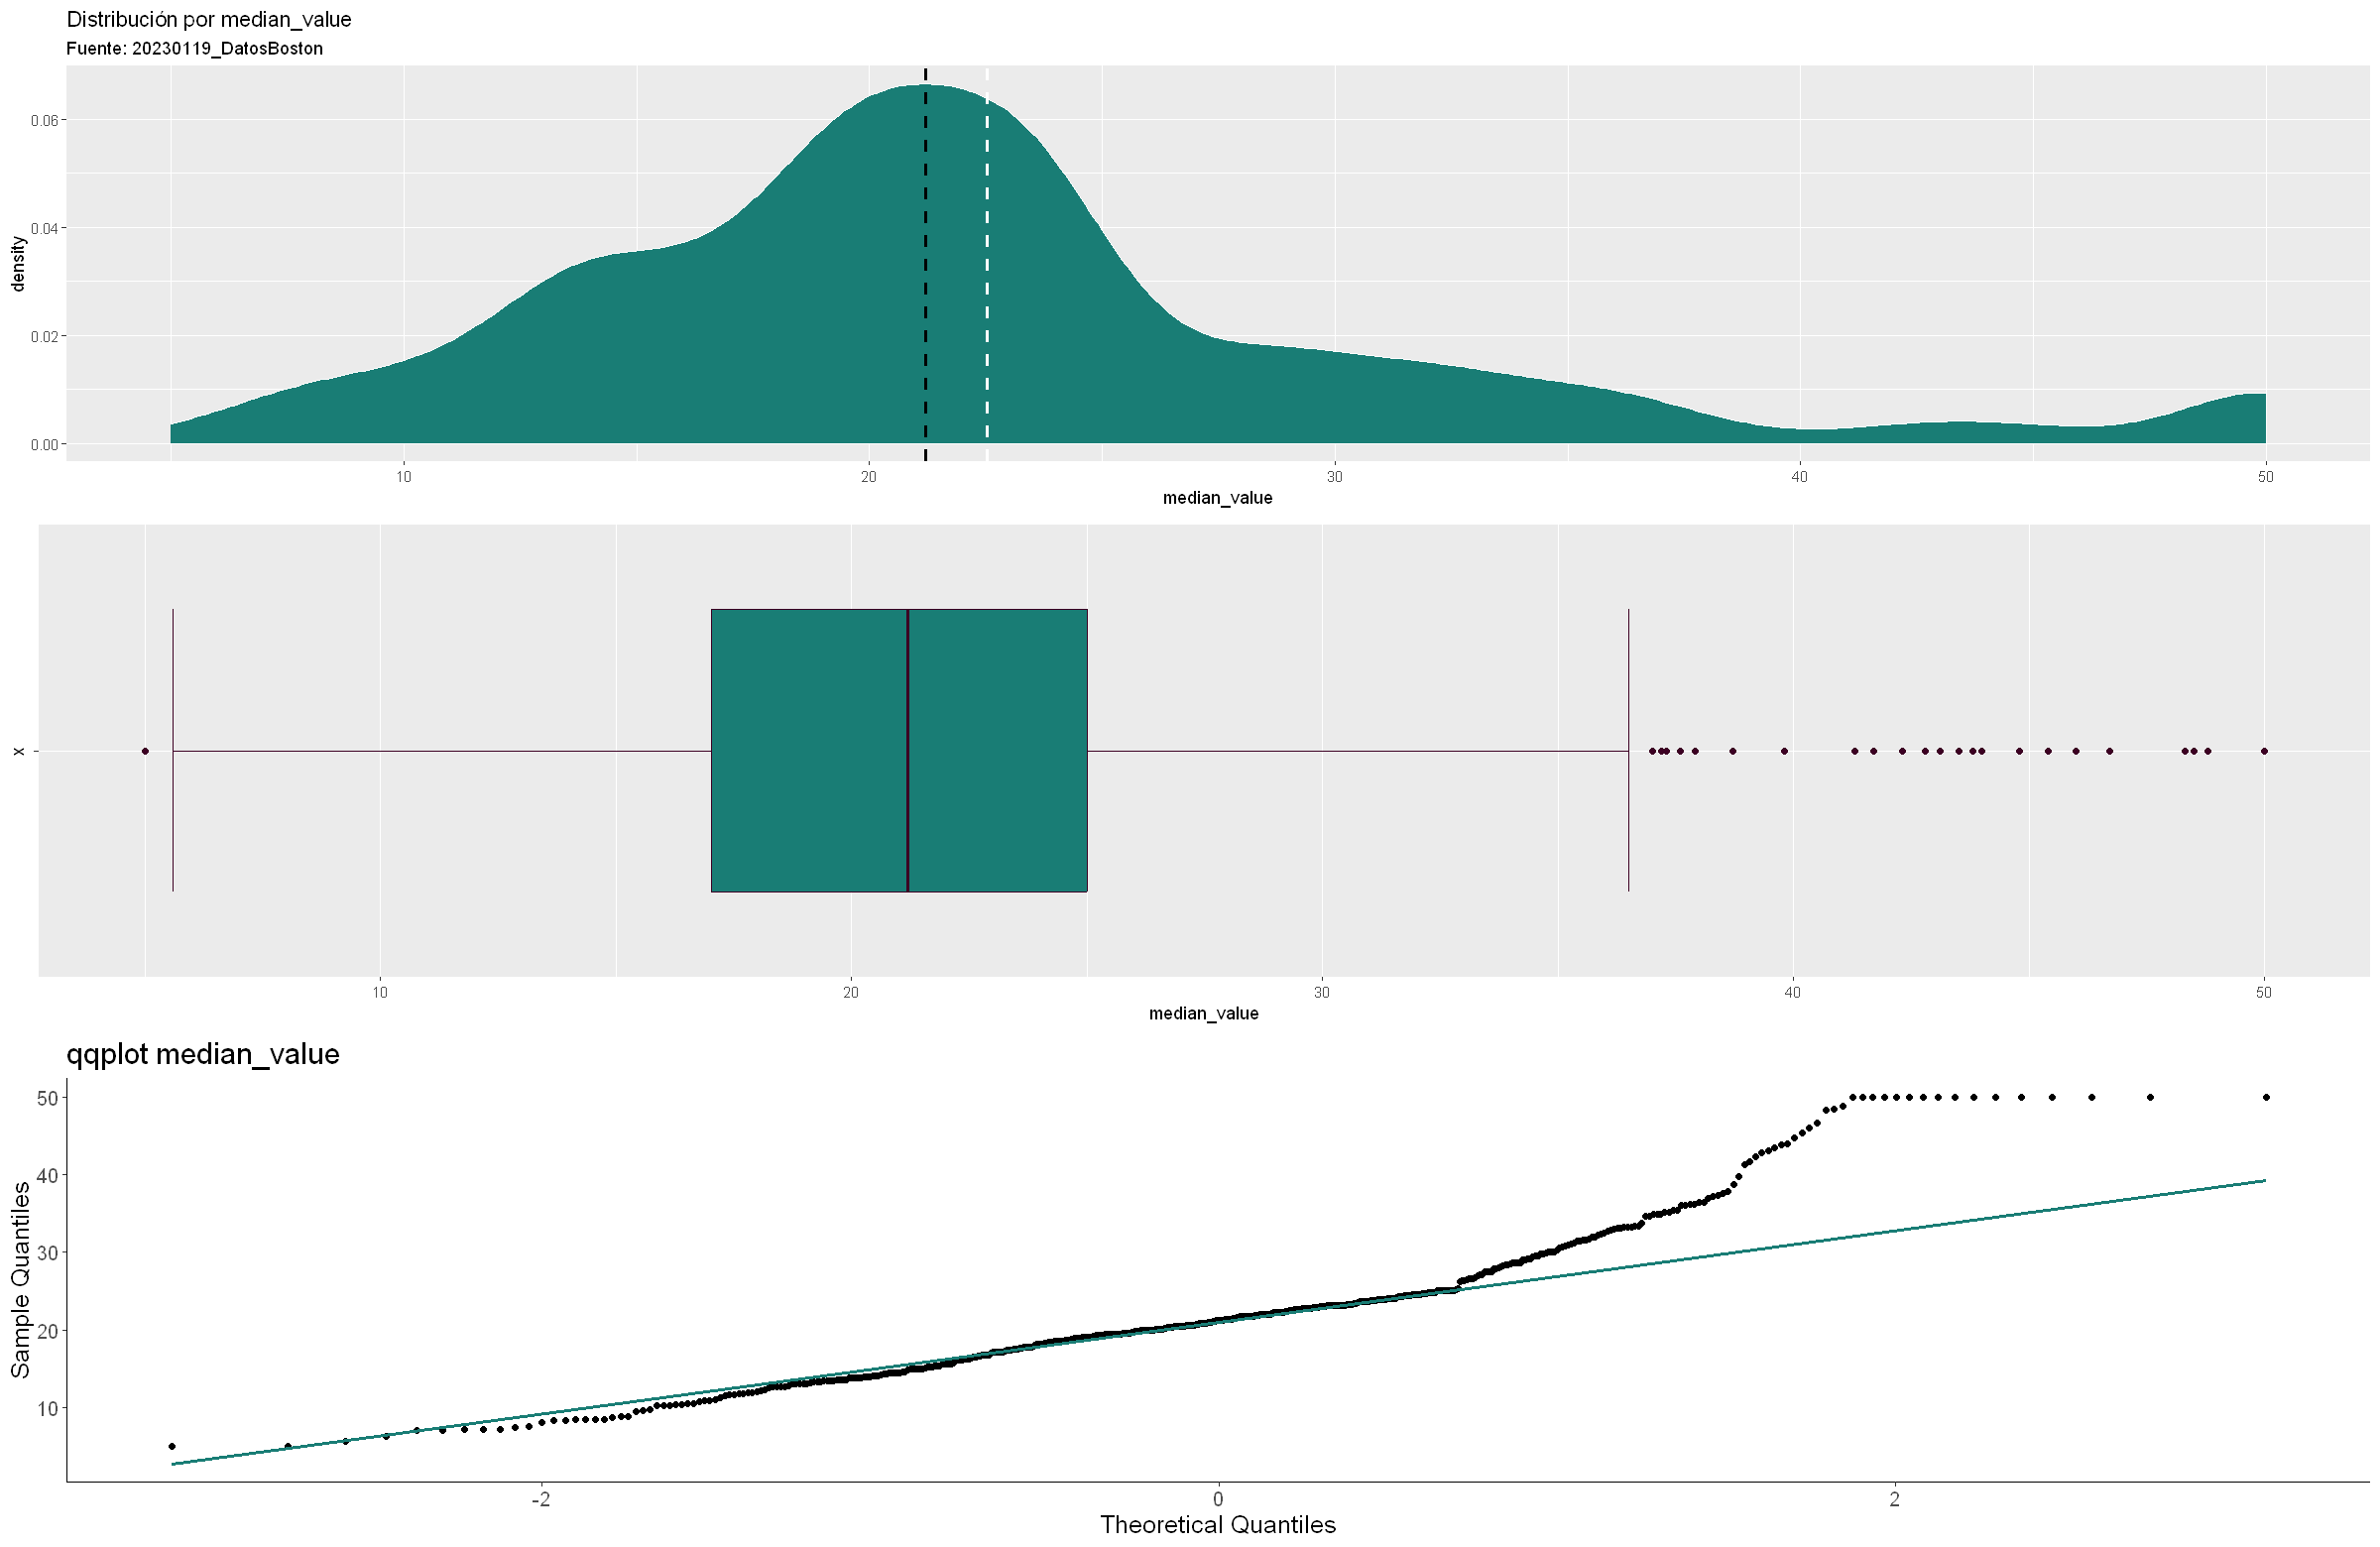

In [9]:
# Calcular la media y la mediana
media <- mean(data$median_value)
mediana <- median(data$median_value)
a= ggplot(data) + 
  aes(x = median_value) + 
 geom_density(fill = "#197D75", color = "white") +
 geom_vline(xintercept = media, linetype = "dashed", color = "white", linewidth = 1) +
 geom_vline(xintercept = mediana, linetype = "dashed", color = "black", linewidth = 1)+
  labs(title="Distribución por median_value"  ,subtitle = "Fuente: 20230119_DatosBoston",x = "median_value")  
b= ggplot(data = data, aes(x = "", y = median_value)) +
       stat_boxplot(geom = "errorbar" ,color = "#3c0023") +
       geom_boxplot(fill = "#197D75",color = "#3c0023") +
       coord_flip()
c <- ggplot(data, aes(sample = median_value)) +
    stat_qq() +
    stat_qq_line(color = '#197D75', lwd = 1) +
    labs(title = paste('qqplot', 'median_value'),
         x = 'Theoretical Quantiles',
         y = 'Sample Quantiles') +
    theme_classic() +
    theme(text = element_text(size = 15))
  
grid.arrange(a,b,c)

####
<font color='#197D75'>**median_value:**</font> El valor medio de precio de la vivienda oscila entre 5.00 y 50.00 (en 1000USD), con una media de 22.53. Lo que estamos observando es una distribución de datos bastante similar a una distribución normal. Como esperábamos, notamos una alta densidad en altos valores de ingreso medio, lo que podria indicar regiones donde las viviendas tienen un valor medio mucho mayor, estas pueden ser regiones turisticas o de oficinas. Ademas, al analizar el boxplot, podemos identificar la presencia de numerosos valores atípicos. Si observamos detenidamente, notaremos muchos puntos fuera de la caja central del gráfico, que el sistema predeterminado identifica como valores atípicos. Probablemente, estos valores son los mismos que esta mostrando la distribucion a su cola derecha. Esto es claramente lo que vuelve levemente asimetrica a derecha la distribucion, lo que se ve claramente en nuestro qqplot, donde el lado derecho tiende a desviar la distribucion de una distribucion normal.

#### <font color='#197D75'>  2. Estrategia para realizar el analisis de la media del valor de la vivienda </font>

####
En el proceso de exploración y modelado de nuestra base de datos, nos enfocaremos en comprender los factores que influyen en la variable objetivo "valor_vivienda". La complejidad de la base de datos nos lleva a adoptar un enfoque sistemático para identificar las variables más relevantes y construir un modelo predictivo robusto.

<font color='#197D75'>**1. Analisis de correlaciones:**</font>
Comenzamos con un análisis de correlacion lineal, evaluando cada variable independiente frente a nuestra variable objetivo. Este paso nos proporciona una visión inicial de la relación lineal entre las variables y nos permite identificar aquellas que podrian tener una asociación significativa con el valor de la vivienda.

<font color='#197D75'>**2. Análisis de PCA:**</font>
En esta etapa, aplicamos un análisis de componentes principales para reducir la dimensionalidad y capturar la esencia de la variabilidad de manera más eficiente. Este enfoque nos permite mantener la información esencial y eliminar la redundancia, facilitando así la interpretación del modelo. Además, 

<font color='#197D75'>**3. Análisis ANOVA:**</font> Realizaremos un análisis de varianza (ANOVA) para las variables categóricas, lo que nos permite entender la variabilidad entre diferentes grupos. Este análisis ayuda a garantizar la robustez de nuestro modelo y a seleccionar variables categoricas relevantes.

<font color='#197D75'>**4.Desarrollo y justificación de las variables:**</font>
Una vez identificadas las variables que presentan una relación estadísticamente significativa con "median_value", procedemos a seleccionar aquellas que contribuyen de manera sustancial a la variabilidad de la variable objetivo. Utilizamos técnicas de selección de variables, ANOVA y Analisis de Componentes principales.

<font color='#197D75'>**5. Estimación y Evaluación del Modelo:**</font>
Finalmente, estimamos el modelo de regresión lineal utilizando las variables seleccionadas. Evaluamos la calidad del modelo mediante métricas de rendimiento, como el coeficiente de determinación (R2) y errores de predicción. Ajustamos el modelo según sea necesario y verificamos su capacidad predictiva en conjuntos de datos independientes o mediante técnicas de validación cruzada.


<font color='#197D75'>**6. Conclusion:**</font>
Esta estrategia integral nos permite construir un modelo de regresión lineal sólido y explicativo para predecir el valor de la vivienda, integrando cuidadosamente la selección de variables, análisis de covarianzas, componentes principales y la investigación de interacciones. Este enfoque nos ayuda a capturar las complejidades subyacentes en los datos y a obtener resultados más confiables y generalizables, para poder realizar conclusiones respecto a la construccion y estimacion de nuestro modelo final.

### <font color='#197D75'>  **1. Analisis de correlaciones** </font>

####
En primer lugar, hagamos un analisis grafico de como se dan las correlaciones de todas las variables independientes con nuestra variable objetivo.

In [10]:
colnames(data)

[1] "crime_index"        "urban_ratio"        "industry_ratio"    
 [4] "c_river_variable"   "nox_concentration"  "rooms_per_dwelling"
 [7] "dwelling_age"       "dwelling_dist"      "highway_index"     
[10] "tax_ratio"          "teacher_ratio"      "racial_index"      
[13] "lower_status"       "median_value"

In [11]:
# Calcula la matriz de correlación
matriz_cor <- cor(data)

# Selecciona la primera y última columna
columnas_seleccionadas <- matriz_cor[, c(1, ncol(matriz_cor))]

# Convierte a un data.frame
df_columnas_seleccionadas <- data.frame(Correlacion = columnas_seleccionadas[, ncol(columnas_seleccionadas)])

# Imprime el data.frame
print("Data.frame de columnas seleccionadas:")
print(df_columnas_seleccionadas)


[1] "Data.frame de columnas seleccionadas:"
                   Correlacion
crime_index         -0.3223877
urban_ratio          0.3604453
industry_ratio      -0.4837252
c_river_variable     0.1752602
nox_concentration   -0.4273208
rooms_per_dwelling   0.6953599
dwelling_age        -0.3769546
dwelling_dist        0.1780964
highway_index       -0.3816262
tax_ratio           -0.4685359
teacher_ratio       -0.5077867
racial_index         0.3334608
lower_status        -0.7376627
median_value         1.0000000


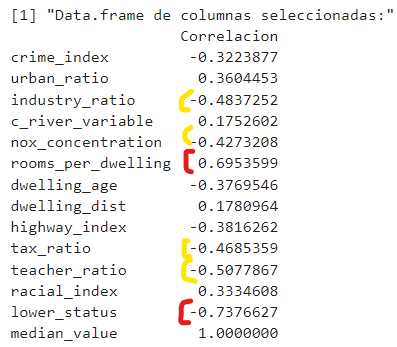

####
Veamos graficamente que sucede con la variables, especialmente como registra sus valores 'c_river_variable'

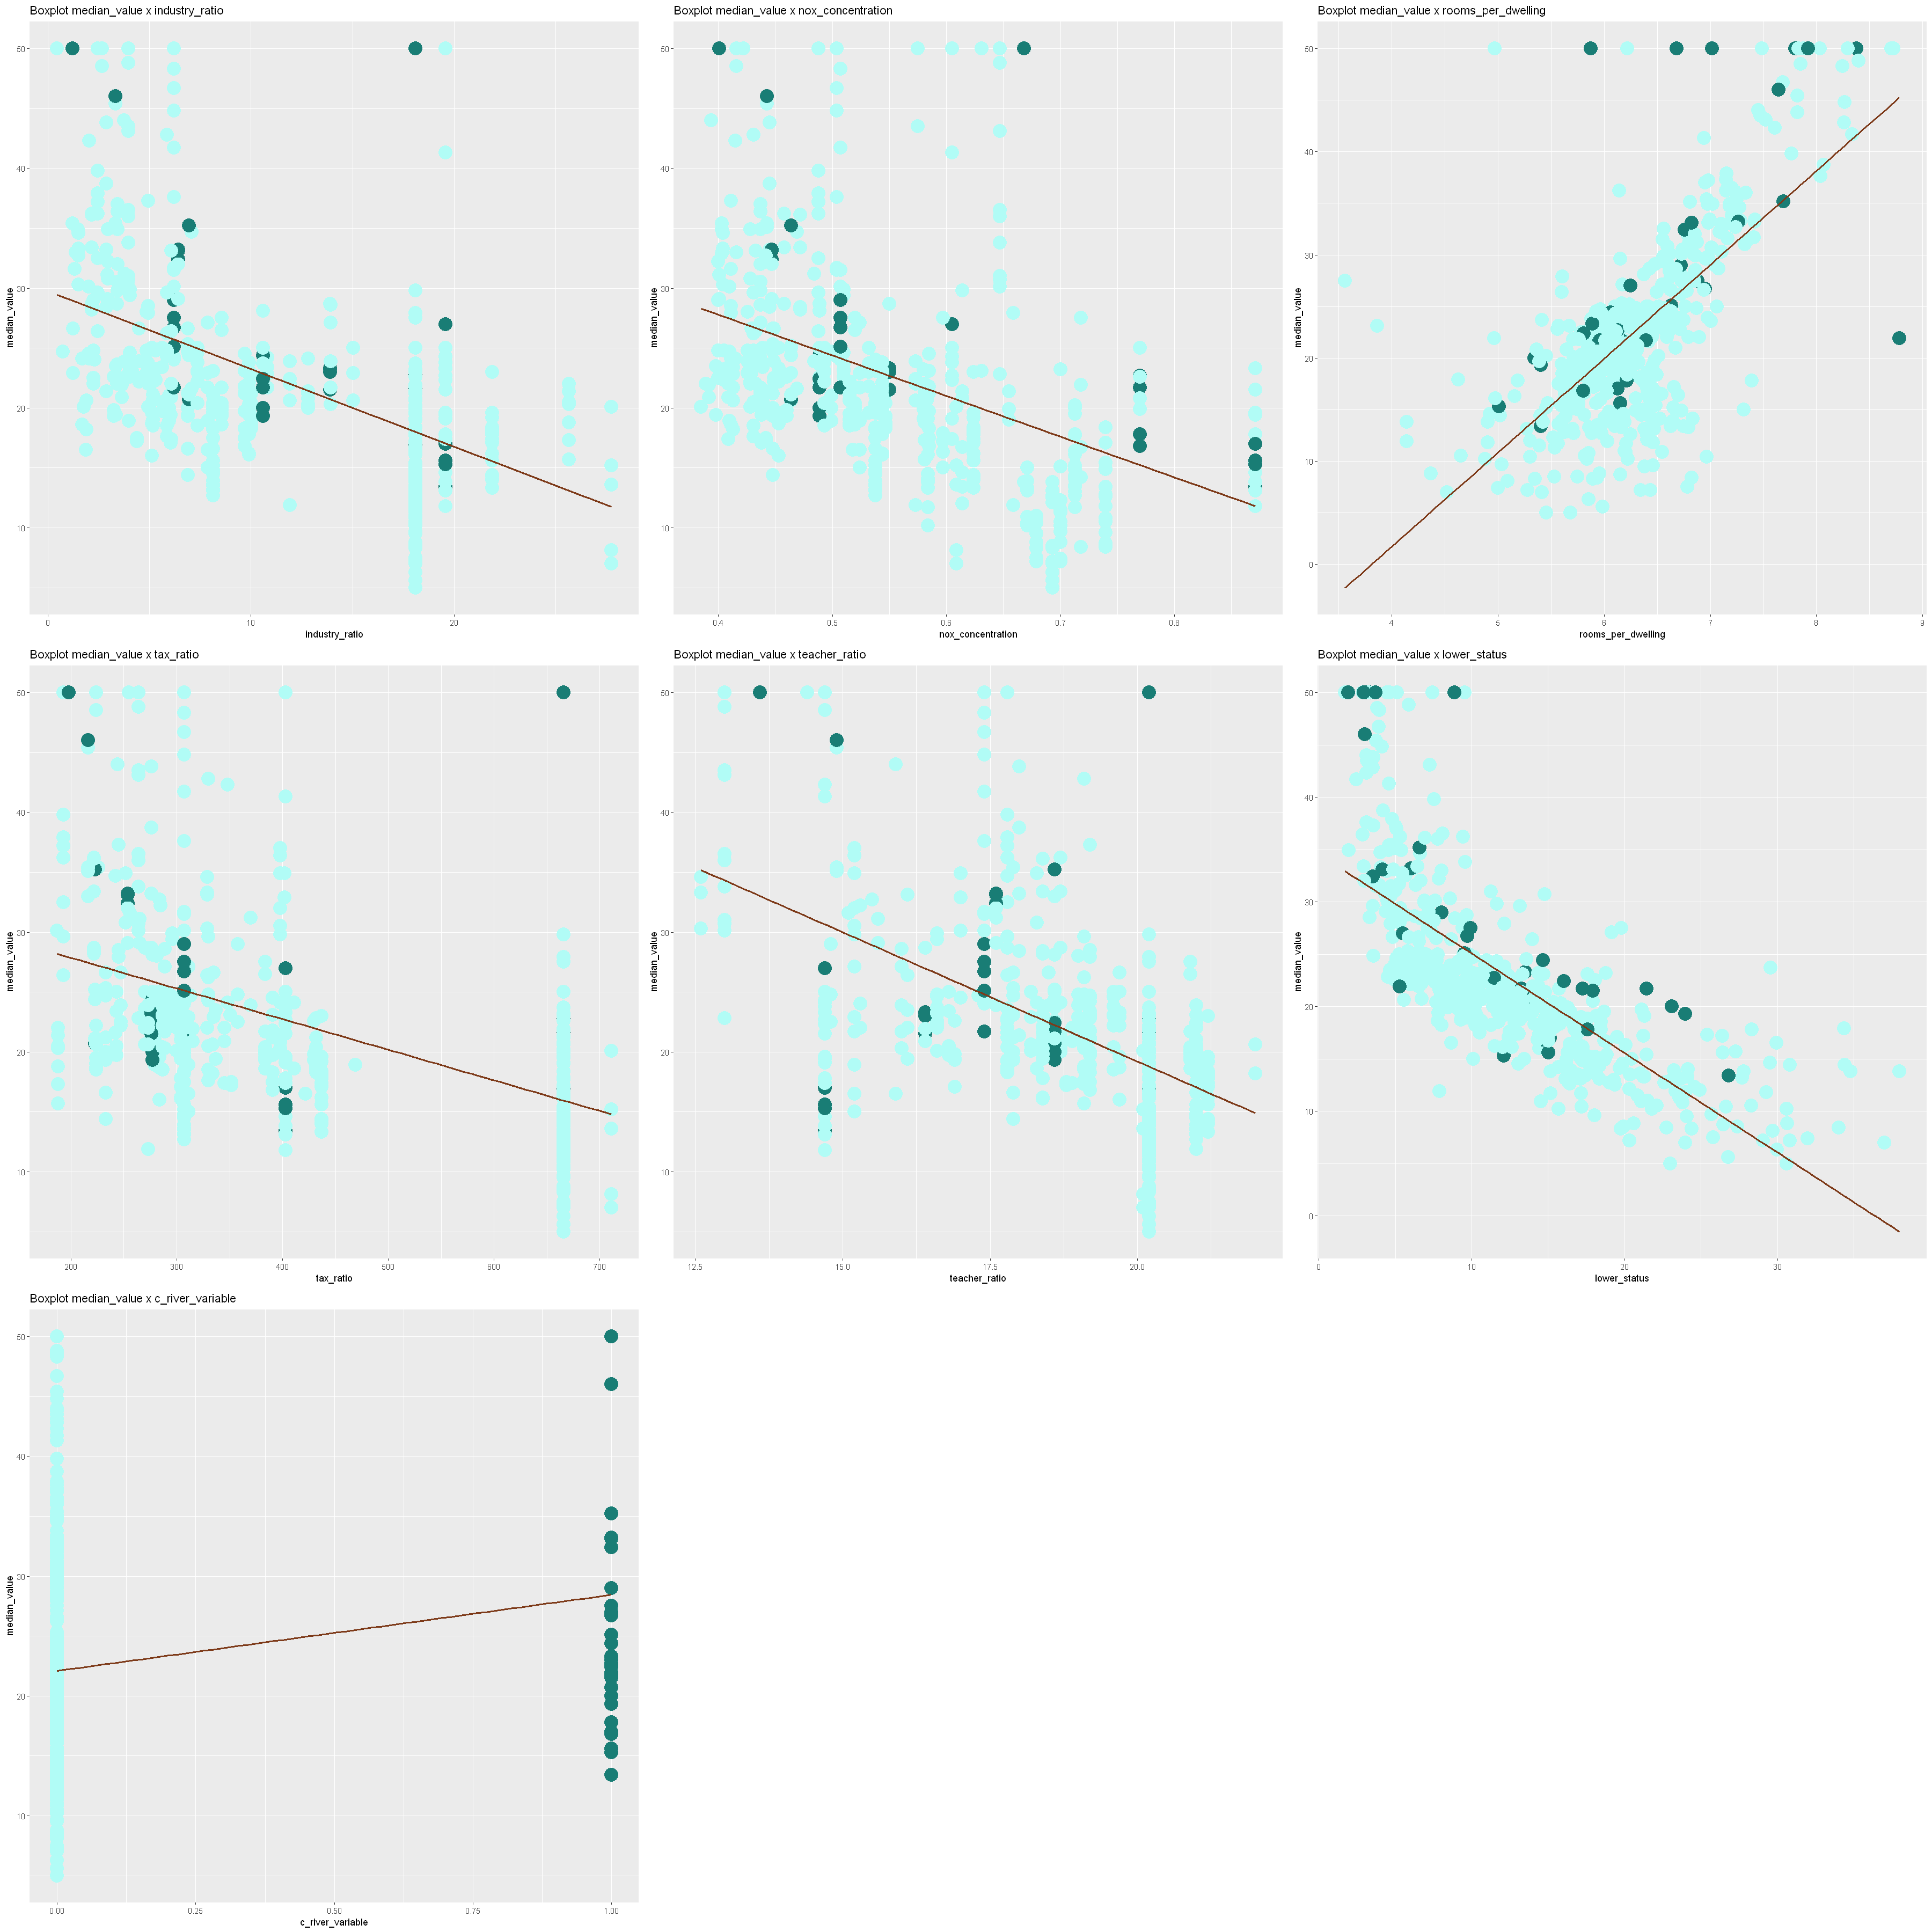

In [12]:
# Lista de variables
variables <- c('industry_ratio', 'nox_concentration', 'rooms_per_dwelling', 'tax_ratio', 'teacher_ratio', 'lower_status', 'c_river_variable')
# Crear una lista para almacenar los gráficos
graficos_scatterplot <- list()

# Iterar sobre cada variable y crear el gráfico
for (variable in variables) {
  grafico <- ggplot(data) +
    aes_string(x = variable, y = 'median_value', color = 'c_river_variable') +
    geom_point(size = 7, show.legend = FALSE) +
    geom_smooth(method = 'lm', se = FALSE, formula = y ~ x, color = '#7D3A19') +
    scale_color_gradient(low = "#B1FCF6", high = "#197D75") +
    labs(title = paste("Boxplot median_value x", variable))
  
  # Agregar el gráfico a la lista
  graficos_scatterplot[[length(graficos_scatterplot) + 1]] <- grafico
}

# Organizar los gráficos en un grid
options(
  repr.plot.width = 30,  
  repr.plot.height = 30  
)
grid.arrange(grobs = graficos_scatterplot, ncol = 3)

####
Hicimos un analisis de correlacion grafico y numerico respecto de nuestra variable objetivo 'media_value' y nuestras variables independientes. En este apartado seleccionamos unicamente aquellas variables que posean, en valor absoluto, una correlacion mayor a 0,4. Sin embargo, en el caso de 'c_river_variable' al ser una variable binaria, vamos a analizarla nuevamente con el analisis de la varianza (ANOVA).

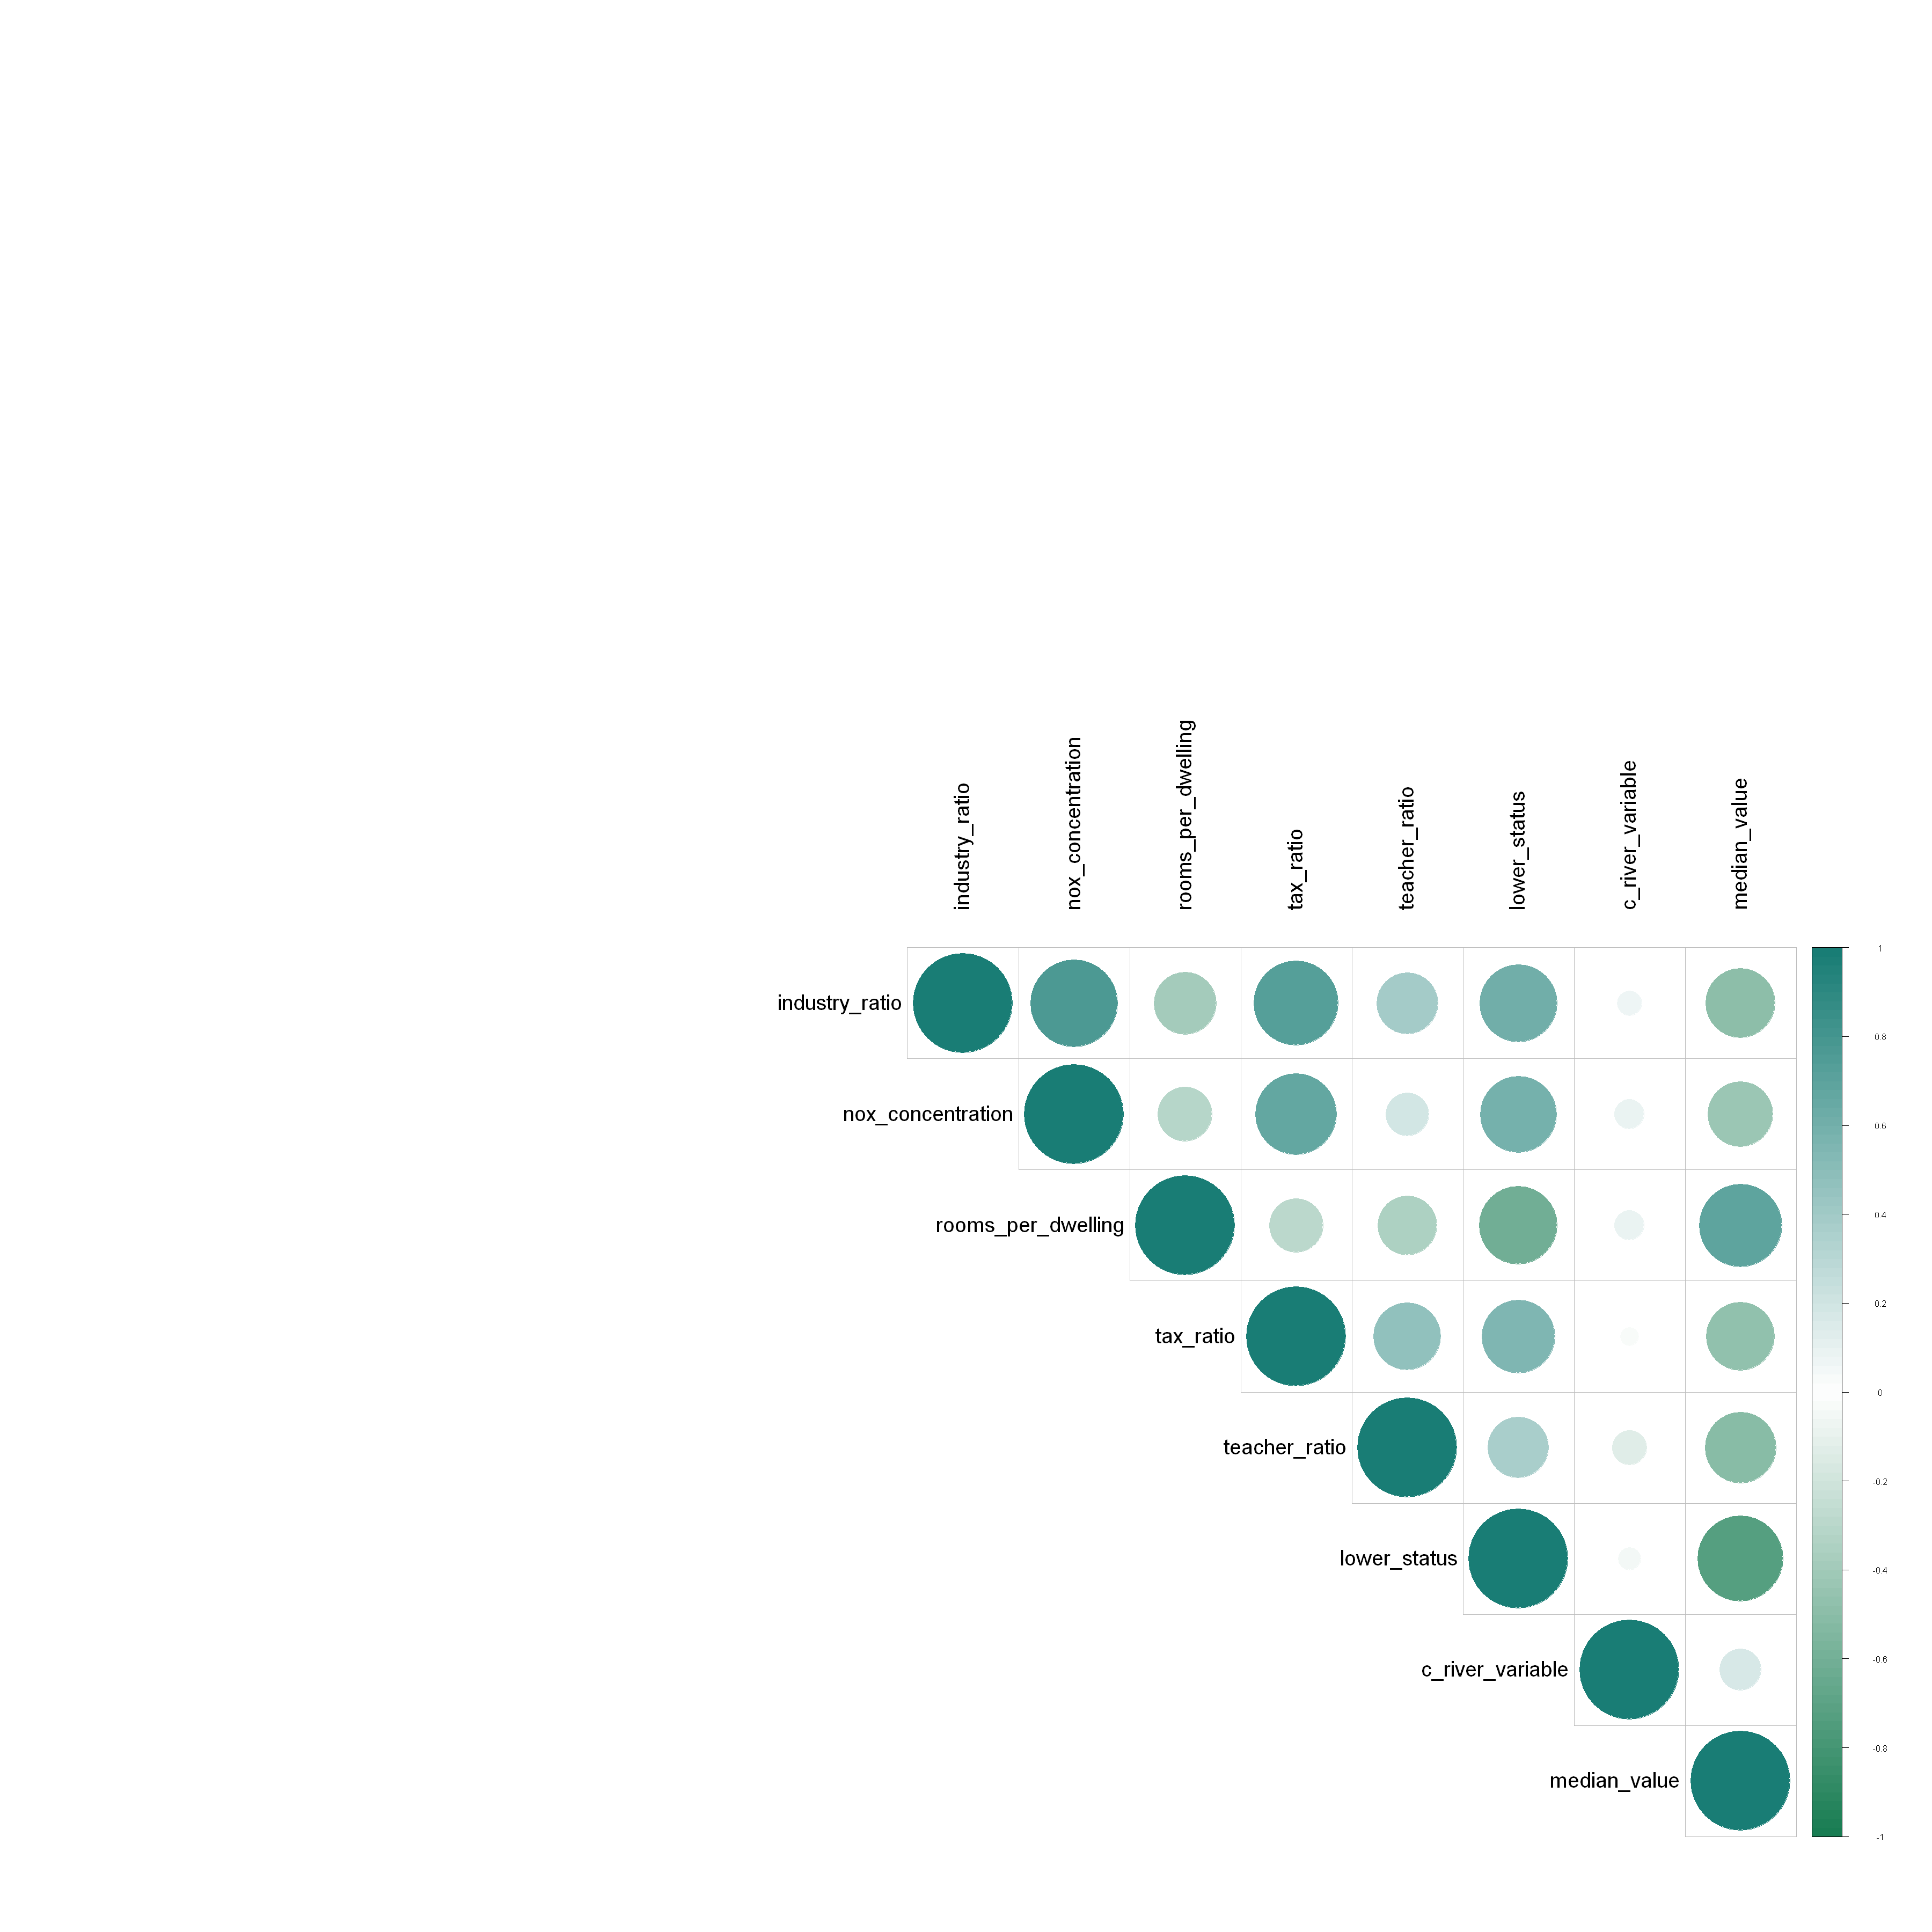

In [13]:
variables <- c('industry_ratio', 'nox_concentration', 'rooms_per_dwelling', 'tax_ratio', 'teacher_ratio', 'lower_status', 'c_river_variable', 'median_value')
subconjunto_data1 <- data[, variables, drop = FALSE]


# Crear el gráfico de correlación
corrplot(
  cor(subconjunto_data1),
  type = "upper",
  tl.col = "black",
  col = colorRampPalette(c("#197D53", 'white', "#197D75"))(100),
  tl.cex = 2
)


####
Este ultimo grafico lo realizamos no solamente para ver la correlacion de las variables independientes respecto a nuestra variable objetivo, sino tambien para poder investigar que tipo de relacion lineal existe entre nuestras variables independientes. Observamos que hay altas correlaciones entre algunas de nuestras variables independientes, como es el caso de 'lower_status', que tiene alta correlacion con 'industry_ratio', 'nox_concentration' y 'rooms_per_dweling'. Esta observaciones es interesante ya que si hay alta correlacion entre nuestras variables independientes, podemos estar repercutiendo negativamente a la variabilidad de nuestro modelo. No haria falta incluir a todas las variables dentro de nuestro modelo ya que estariamos entrando en problemas de alta multicolinealidad. Con lo cual decidimos quedarnos unicamente con 'lower_status' ya que presenta una alta correlacion en terminos absolutos con nuestra variable dependiente, y ademas en terminos teoricos tiene bastante logica su interpretacion. Entonces, a traves de nuestro analisis de correlaciones, postulamos 2 variables a considerar dentro de nuestro modelo predictivo: 'lower_status' y 'teacher_ratio'. Sin embargo, dentro de estas variable agregamos 'c_river_variable' por interes teorico.

### <font color='#197D75'>**2. Principal Component Analysis (PCA):**</font>

In [14]:
# Variables seleccionadas
variables_seleccionadas <- c('crime_index', 'urban_ratio', 'industry_ratio', 'nox_concentration', 'rooms_per_dwelling', 'dwelling_age', 'dwelling_dist', 'highway_index', 'tax_ratio', 'teacher_ratio', 'racial_index', 'lower_status')

# Crear el subconjunto
subconjunto_data2 <- data[, variables_seleccionadas]

# Normalizar los datos
subconjunto_data2_normalizado <- scale(subconjunto_data2)

In [15]:
round(cor(subconjunto_data2),2)
acp = princomp(subconjunto_data2,cor=TRUE)
summary(acp)
print('desviación estandard componente1:')
sd(predict(acp)[,1:1])
print('varianza componente1:')
var(predict(acp)[,1:1])

,crime_index,urban_ratio,industry_ratio,nox_concentration,rooms_per_dwelling,dwelling_age,dwelling_dist,highway_index,tax_ratio,teacher_ratio,racial_index,lower_status
crime_index,1.00,-0.26,0.54,0.58,-0.15,0.41,-0.35,0.77,0.73,0.33,-0.33,0.38
urban_ratio,-0.26,1.00,-0.53,-0.52,0.31,-0.57,0.50,-0.31,-0.31,-0.39,0.18,-0.41
industry_ratio,0.54,-0.53,1.00,0.76,-0.39,0.64,-0.56,0.60,0.72,0.38,-0.36,0.60
nox_concentration,0.58,-0.52,0.76,1.00,-0.30,0.73,-0.62,0.61,0.67,0.19,-0.38,0.59
rooms_per_dwelling,-0.15,0.31,-0.39,-0.30,1.00,-0.24,0.15,-0.21,-0.29,-0.36,0.13,-0.61
dwelling_age,0.41,-0.57,0.64,0.73,-0.24,1.00,-0.64,0.46,0.51,0.26,-0.27,0.60
dwelling_dist,-0.35,0.50,-0.56,-0.62,0.15,-0.64,1.00,-0.38,-0.41,-0.14,0.22,-0.43
highway_index,0.77,-0.31,0.60,0.61,-0.21,0.46,-0.38,1.00,0.91,0.46,-0.44,0.49
tax_ratio,0.73,-0.31,0.72,0.67,-0.29,0.51,-0.41,0.91,1.00,0.46,-0.44,0.54
teacher_ratio,0.33,-0.39,0.38,0.19,-0.36,0.26,-0.14,0.46,0.46,1.00,-0.18,0.37


Importance of components:
                          Comp.1    Comp.2    Comp.3     Comp.4     Comp.5
Standard deviation     2.4558609 1.1671344 1.1032662 0.91899327 0.83360592
Proportion of Variance 0.5026044 0.1135169 0.1014330 0.07037905 0.05790824
Cumulative Proportion  0.5026044 0.6161213 0.7175543 0.78793334 0.84584158
                           Comp.6     Comp.7     Comp.8     Comp.9    Comp.10
Standard deviation     0.65379430 0.61044283 0.58702929 0.50530319 0.46408767
Proportion of Variance 0.03562058 0.03105337 0.02871695 0.02127761 0.01794811
Cumulative Proportion  0.88146216 0.91251553 0.94123248 0.96251009 0.98045820
                          Comp.11     Comp.12
Standard deviation     0.41331156 0.252339242
Proportion of Variance 0.01423554 0.005306258
Cumulative Proportion  0.99469374 1.000000000

[1] "desviación estandard componente1:"


[1] 2.458291

[1] "varianza componente1:"


[1] 6.043196

####
Al considerar Comp.1, Comp.2 y Comp.3, se explica aproximadamente el 67,41% de la varianza total. Sin embargo, decidimos incluir hasta al Comp.4 en nuestro analaisis. Entre estos cuatro, explican aproximadamente un 80% de la variabilidad de los datos. Consideramos utilizar estos componentes para reducir la dimensionalidad de los datos sin perder demasiada informacion.

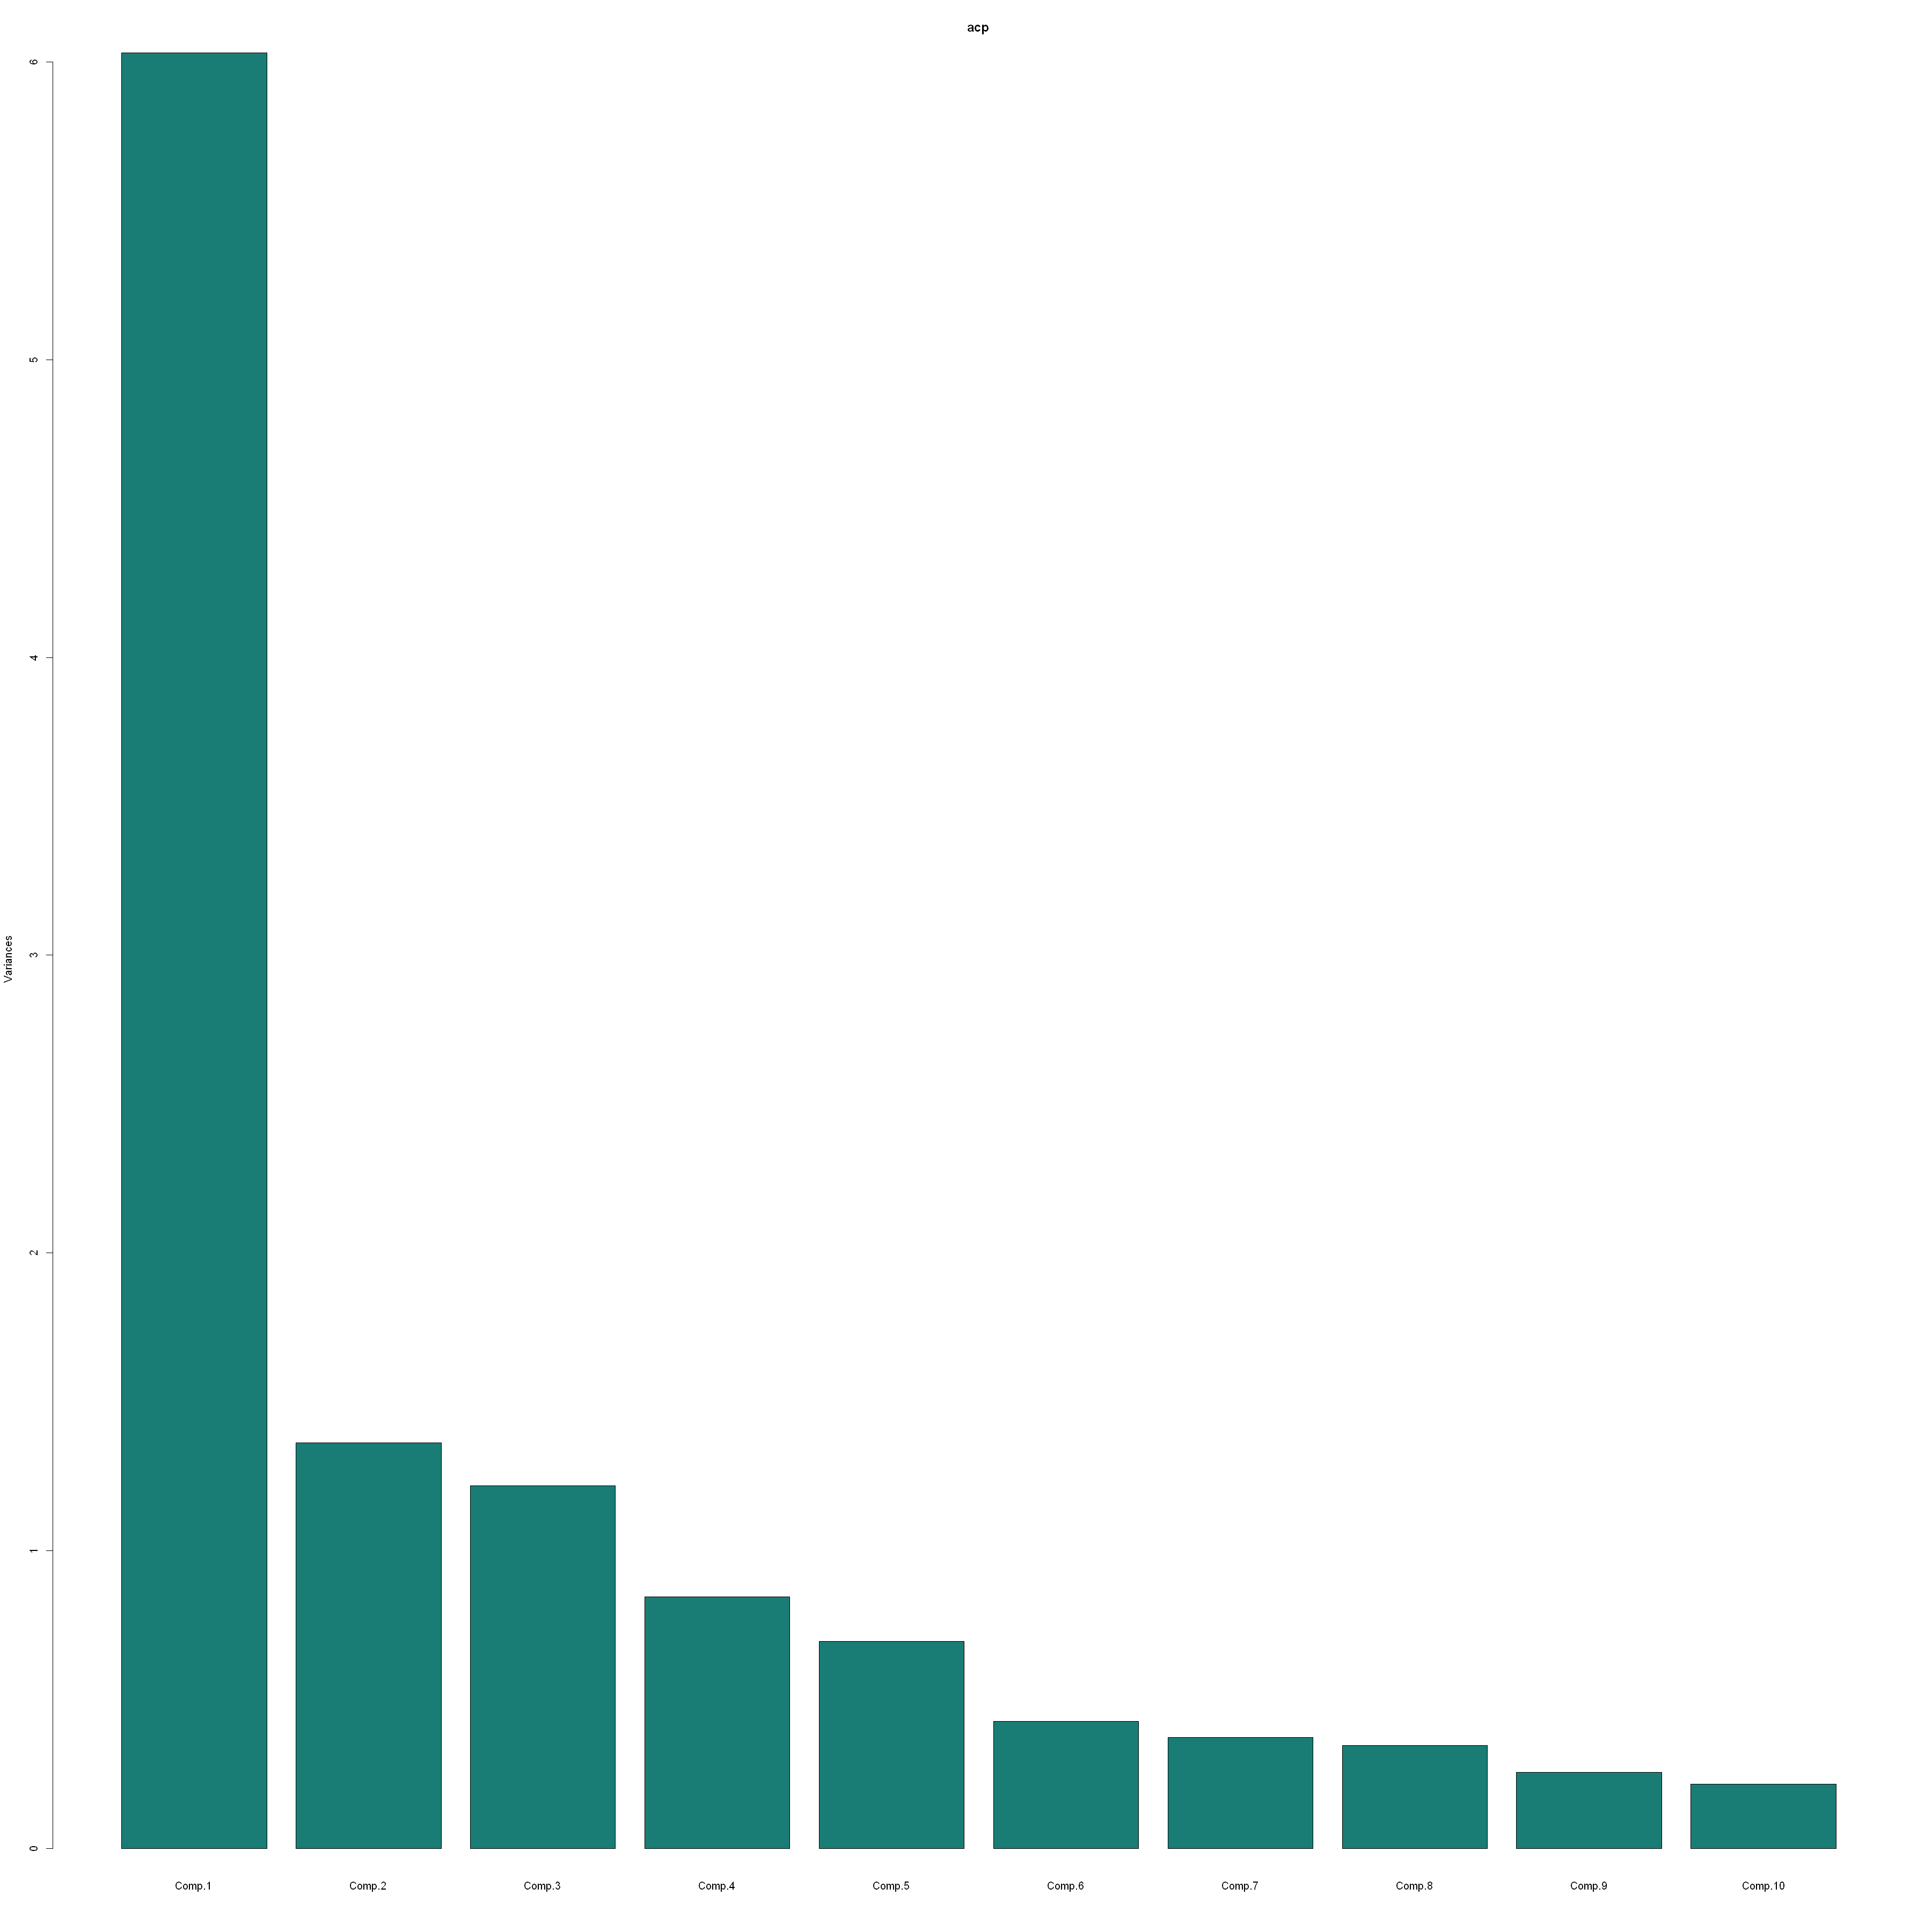

In [16]:
plot(acp, col = '#197D75')

In [17]:
loadings(acp)


Loadings:
                   Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8
crime_index         0.290  0.404         0.166  0.246  0.215         0.513
urban_ratio        -0.251  0.406        -0.348  0.399 -0.556        -0.240
industry_ratio      0.350                              0.194        -0.698
nox_concentration   0.347         0.254 -0.110  0.168  0.239 -0.146 -0.129
rooms_per_dwelling -0.186  0.306  0.596  0.291 -0.296 -0.184 -0.332       
dwelling_age        0.314 -0.279  0.249               -0.253 -0.565  0.138
dwelling_dist      -0.265  0.283 -0.402                0.473 -0.674       
highway_index       0.329  0.415         0.110                            
tax_ratio           0.347  0.342                0.139               -0.241
teacher_ratio       0.207        -0.530  0.492 -0.373 -0.350        -0.117
racial_index       -0.202 -0.264         0.616  0.687                     
lower_status        0.307 -0.206 -0.252 -0.337  0.142 -0.315 -0.267  0.256
              

####
Los valores mas altos en magnitud indican una mayor contribucion de esa variable al componente principal correspondiente. Un loading positivo significa una relación positiva, mientras que un loading negativo significa una relación negativa. Los loadings cercanos a cero indican que la variable tiene una contribución baja al componente. En nuestro caso, al quedarnos con los componentes 1:6, seleccionamos las variables que tienen loadings más altos en estos componentes. 

In [18]:
mcomponentes = cor(subconjunto_data2,predict(acp)[,1:4]) 
mcomponentes
apply(mcomponentes*mcomponentes,1,sum)

,Comp.1,Comp.2,Comp.3,Comp.4
crime_index,0.7125499,0.47114263,0.09409669,0.152513937
urban_ratio,-0.6174346,0.47346560,-0.01351245,-0.319404918
industry_ratio,0.8592487,-0.09174701,0.04284603,0.006244525
nox_concentration,0.8519576,-0.09718545,0.28044297,-0.101481433
rooms_per_dwelling,-0.4565183,0.35724948,0.65773896,0.267528778
dwelling_age,0.7701133,-0.32607730,0.27500572,0.030021024
dwelling_dist,-0.6505668,0.33069181,-0.44306401,-0.063998880
highway_index,0.8080864,0.48406645,-0.02695591,0.101533424
tax_ratio,0.8525627,0.39935721,-0.04654563,0.040389436
teacher_ratio,0.5085209,0.08870757,-0.58456270,0.452172414


crime_index        urban_ratio     industry_ratio  nox_concentration 
         0.7618175          0.7075973          0.7486007          0.8242234 
rooms_per_dwelling       dwelling_age      dwelling_dist      highway_index 
         0.8402283          0.7759303          0.7329958          0.8983596 
         tax_ratio      teacher_ratio       racial_index       lower_status 
         0.8901472          0.8126360          0.6615569          0.8011071

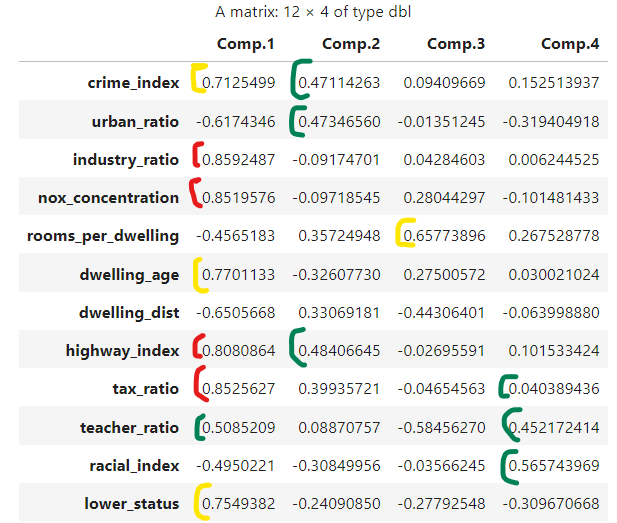

####
El PCA nos indica que del componente 1, los que mas aportan a la varianza son industry_ratio, nox_concentration, highway_index y tax_ratio, seguido de lower_status, dwelling_age y cime_index. Luego, de los demas componentes podriamos agregar el peso de rooms_per_dwelling en el Comp.3, teacher_ratio y racial_index.
Combinando nuestro analisis de correlacion con nuestro analisis de PCA decidimos quedarnos con 2 variables para realizar nuestro modelo: 'lower_Status'  y 'teacher_ratio'. Ahora pasaremos a hacer un analisis de la varianza a traves del ANOVA, evaluando la variable 'c_river_variable'.

### <font color='#197D75'>  **3. Analysis of Variance (ANOVA)** </font>

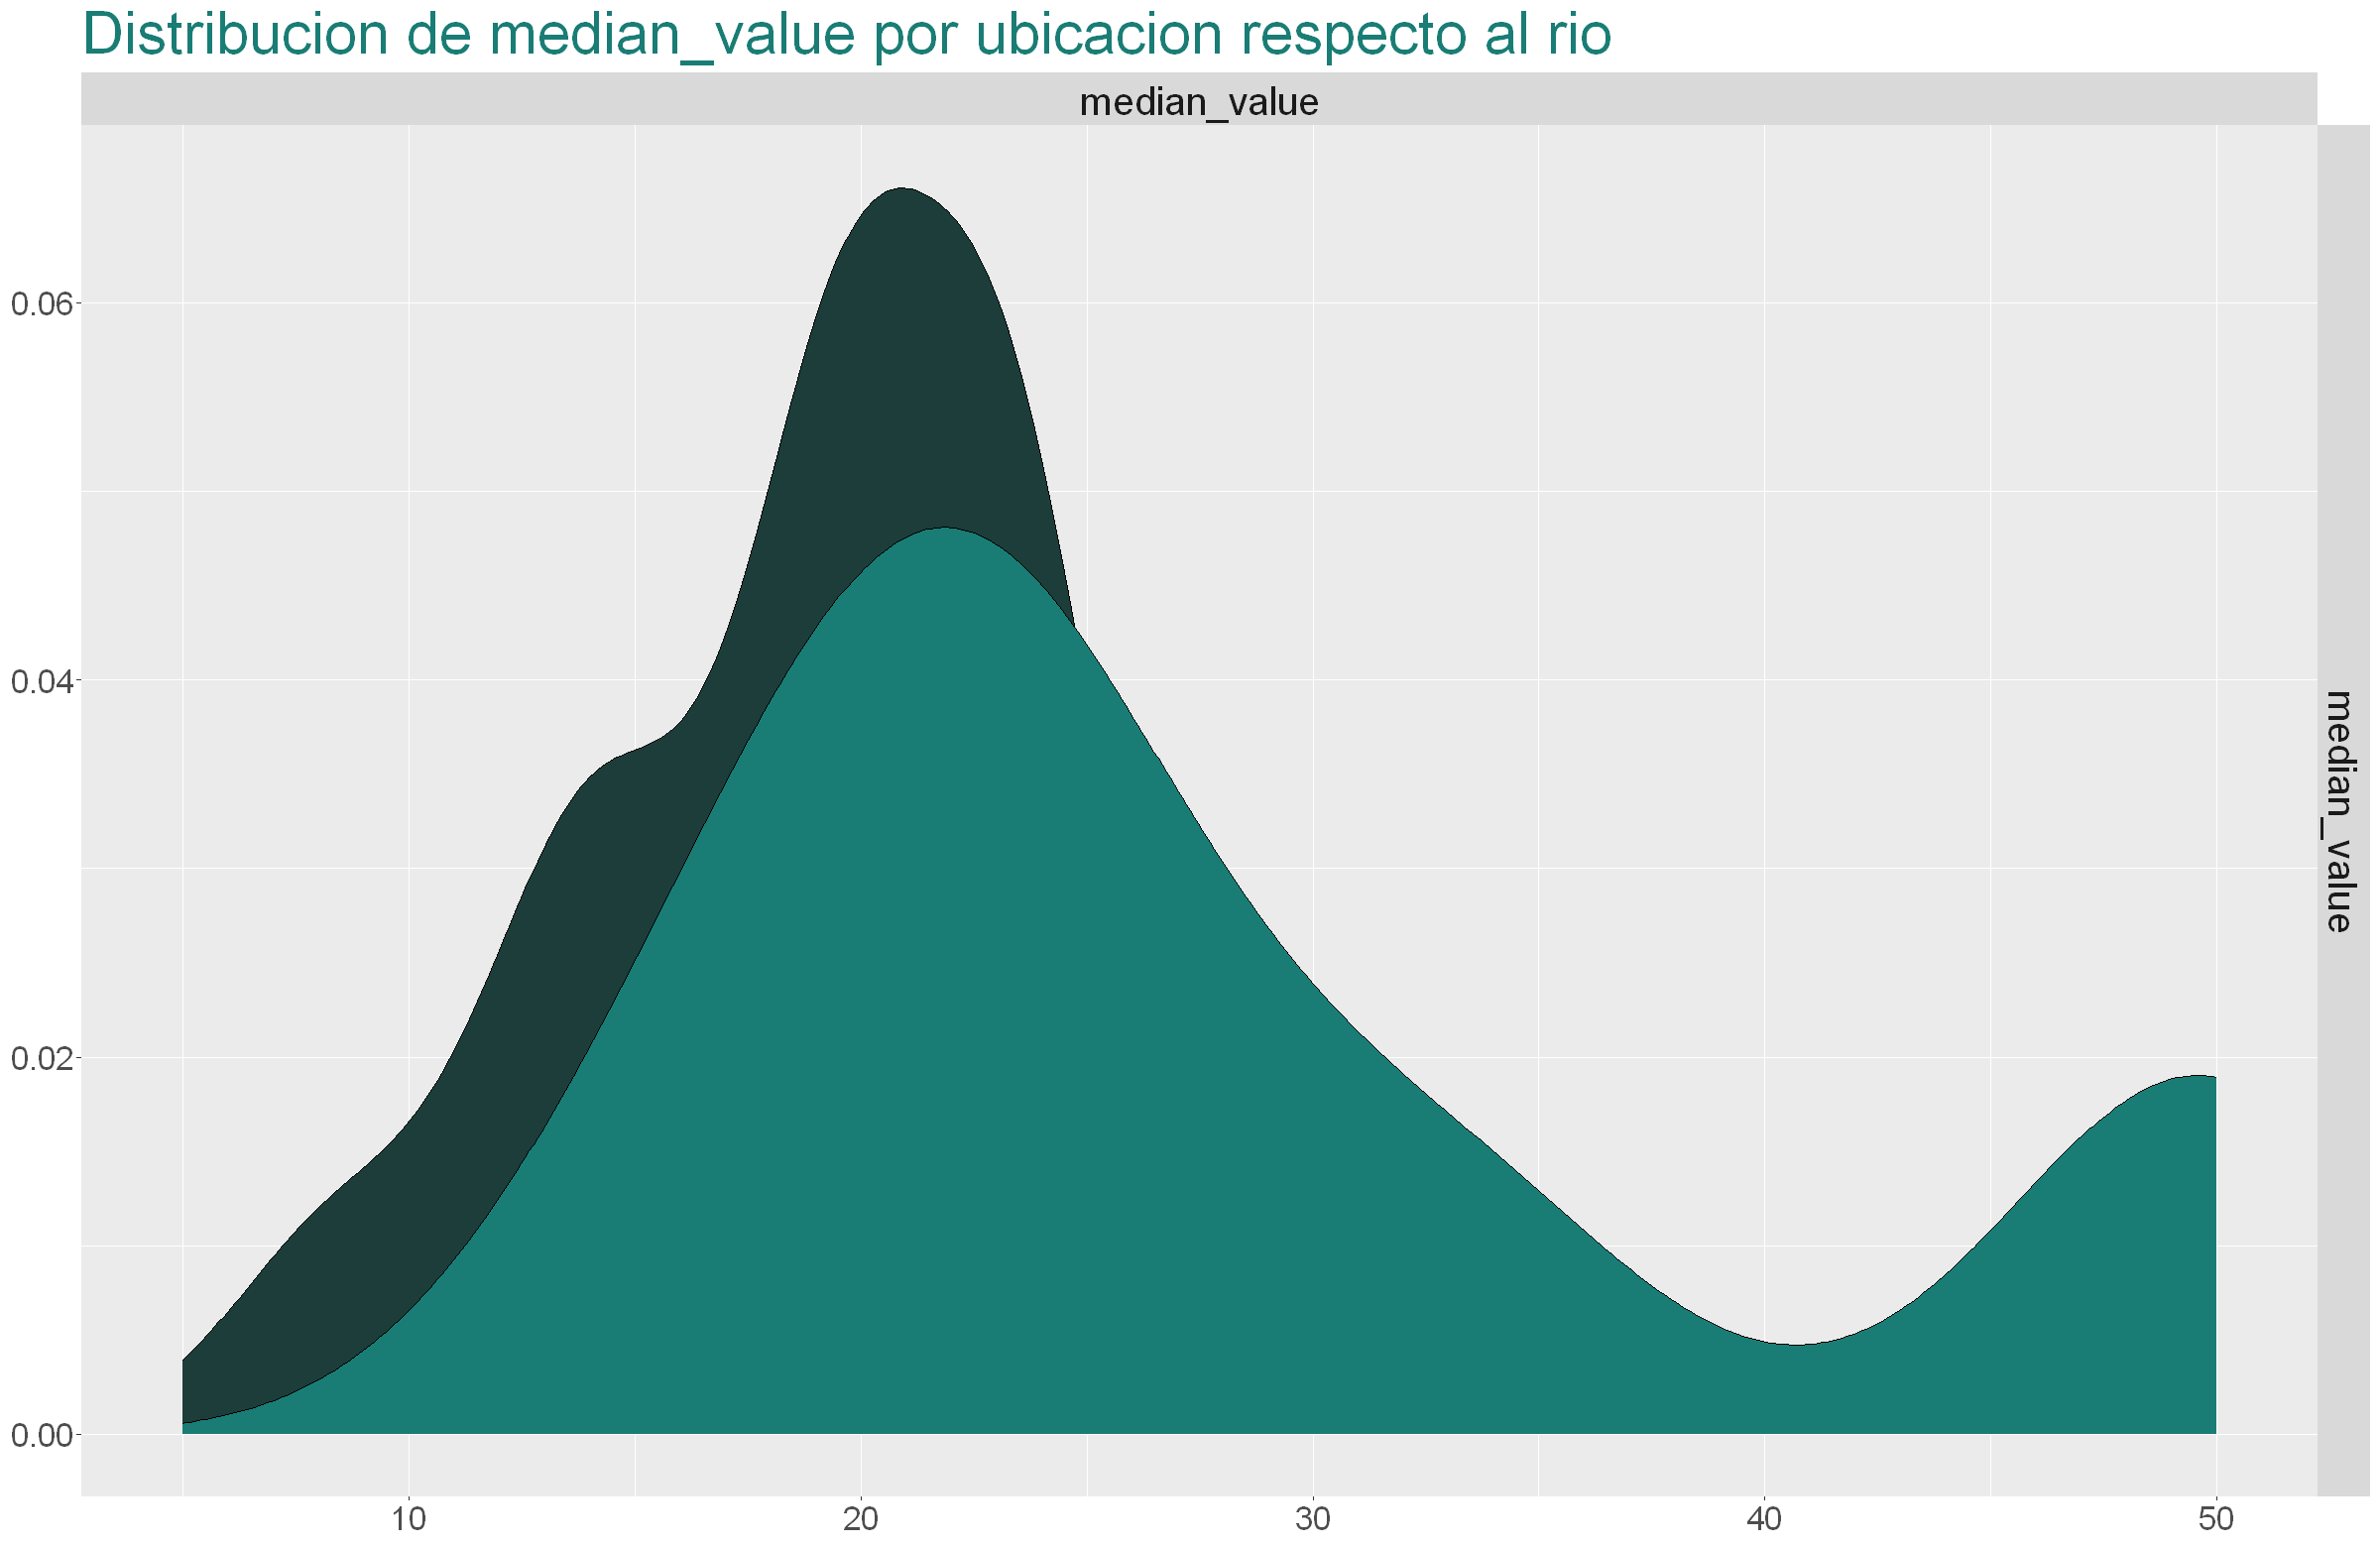

In [19]:
data3 <- data[, c('c_river_variable', 'median_value')]

options(
  repr.plot.width = 20,  
  repr.plot.height = 13
)

ggpairs(data3, 
        aes(color = as.factor(c_river_variable)),   # Asigna el color según la variable 'sport'
        title = "Distribucion de median_value por ubicacion respecto al rio",
        lower = list(continuous = ggally_smooth, combo = ggally_facethist, discrete = ggally_box),
        upper = list(continuous = ggally_cor),  # Agrega las correlaciones en la parte superior se puede probar tmb covarianza
        diag = list(continuous = ggally_densityDiag, discrete = ggally_barDiag),
        columns = 2:ncol(data3),  # Excluye la columna 'sport' de las columnas
        progress = FALSE) +
theme(
  text = element_text(size = 30), 
  axis.text = element_text(size = 20),
  axis.title = element_text(size = 25),
  plot.title = element_text(color = "#197D75")
) +
scale_fill_manual(values = rev(c("#197D75", '#1C3D3A'))) +
scale_color_manual(values = rev(c("#197D75", '#1C3D3A')))


####
Vemos que hay una diferencia en la distribucion del valor medio de la vivienda en relacion a la ubicacion respecto al rio. Sin embargo, para poder investigar mejor esta diferencia debemos realizar un analisis de la varianza. 

El ANOVA se basa en varios supuestos clásicos. Es importante tener en cuenta que violaciones a estos supuestos pueden afectar la validez de los resultados. Los supuestos clásicos que se deben cumplir para tener un resultado ANOVA estadisticamente confiable son:

<font color='#197D75'> 1. **Normalidad de los Residuos:** </font> Los residuos (diferencias entre los valores observados y los valores predichos) deben seguir una distribución normal. Esto se verifica típicamente mediante gráficos de residuos o pruebas estadísticas como la prueba de normalidad de Shapiro-Wilk.

<font color='#197D75'> 2. **Homogeneidad de las Varianzas (Homocedasticidad):** </font>La varianza de los residuos debe ser constante en todos los niveles de la variable independiente. Puedes evaluar esto visualmente mediante gráficos de dispersión de residuos o estadísticamente mediante pruebas formales como la prueba de Levene, la prueba de Breusch Pagan o la prueba de Bartlett.

Antes de realizar un ANOVA, se recomienda verificar estos supuestos para asegurarse de que los resultados del análisis sean confiables. En caso de violación de estos supuestos, se pueden explorar alternativas o transformaciones de datos para abordar estas cuestiones.


##### <font color='#197D75'>  3.1 Normalidad </font>

#####
Que nuestros residuos sigan una distribucion normal significa que los estimadores calculados mediante MCO tienen propiedades estadísticas deseables, como ser insesgados y eficientes.

<font color='#197D75'>**Prueba estadística:** </font> la prueba de Shapiro-wilk sobre los residuos (muestras con pocas observaciones).

H0: La variable presenta una distribución normal
<br>
H1: La variable presenta una distribución no normal


Sig(p valor) > 0.05: No rechazar H0 (normal)
<br>
Sig(p valor) < 0.05: Rechazar H0

In [20]:
variables = c('median_value')
categorias = c('0', '1')
resultados <- data.frame(Variable = character(), Cat = character(), Shapiro = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  for (cat in categorias) {
    data_subset = subset(data3, c_river_variable == cat)
    result = shapiro.test(data_subset[, variable])
    resultados = rbind(resultados, data.frame(Variable = variable, Cat = cat, Shapiro = result$statistic, PValor = round(result$p.value, 3)))
  }
}

print(resultados)

       Variable Cat   Shapiro PValor
W  median_value   0 0.9282612      0
W1 median_value   1 0.8359233      0


####
Pasan la prueba de normalidad.

##### <font color='#197D75'>  3.2 Homocedasticidad </font>

#####
La homocedasticidad es una propiedad que deseamos en nuestros modelos estadísticos, especialmente en los modelos de regresión. En términos sencillos, significa que la varianza de los errores del modelo debe ser constante a medida que cambian las variables que estamos estudiando. Para comprobar la homocedasticidad haremos dos cosas. La primera, generaremos una visualizacion de los residuos en comparacion con los valores ajustados. En segundo lugar, haremos un test estadistico llamado prueba de Bartlett, quien nos confiramara la presencia o no de homocedasticidad en los errores de cada modelo.

El test de Bartlett es una prueba estadística utilizada para evaluar la homocedasticidad, es decir, la igualdad de varianzas entre diferentes muestras. En el contexto de este test, se plantean las siguientes hipótesis:

Hipótesis Nula (H0): Las muestras provienen de poblaciones con varianzas iguales.

Hipótesis Alternativa (H1): Las muestras provienen de poblaciones con varianzas distintas.

En otras palabras, el test de Bartlett busca determinar si la variabilidad dentro de cada grupo es estadísticamente similar. Si el valor-p asociado con el test es menor que un nivel de significancia predefinido (por ejemplo, 0.05), se rechaza la hipótesis nula, indicando que al menos una de las muestras tiene una varianza significativamente diferente de las demás.

In [21]:
variables = c('median_value')
resultados_bartlett = data.frame(Variable = character(), Estadistico = numeric(), PValor = numeric(), row.names = NULL)

for (variable in variables) {
  resultado_bartlett = bartlett.test(get(variable) ~ c_river_variable, data = data3)
  resultados_bartlett = rbind(resultados_bartlett, data.frame(Variable = variable, Estadistico = resultado_bartlett$statistic, PValor = resultado_bartlett$p.value))
}

print(resultados_bartlett)

                         Variable Estadistico     PValor
Bartlett's K-squared median_value    6.315541 0.01196842


####
Pasan la prueba de homocedasticidad

Observemos un grafico de violin para cada categoria respecto a la variable median_value

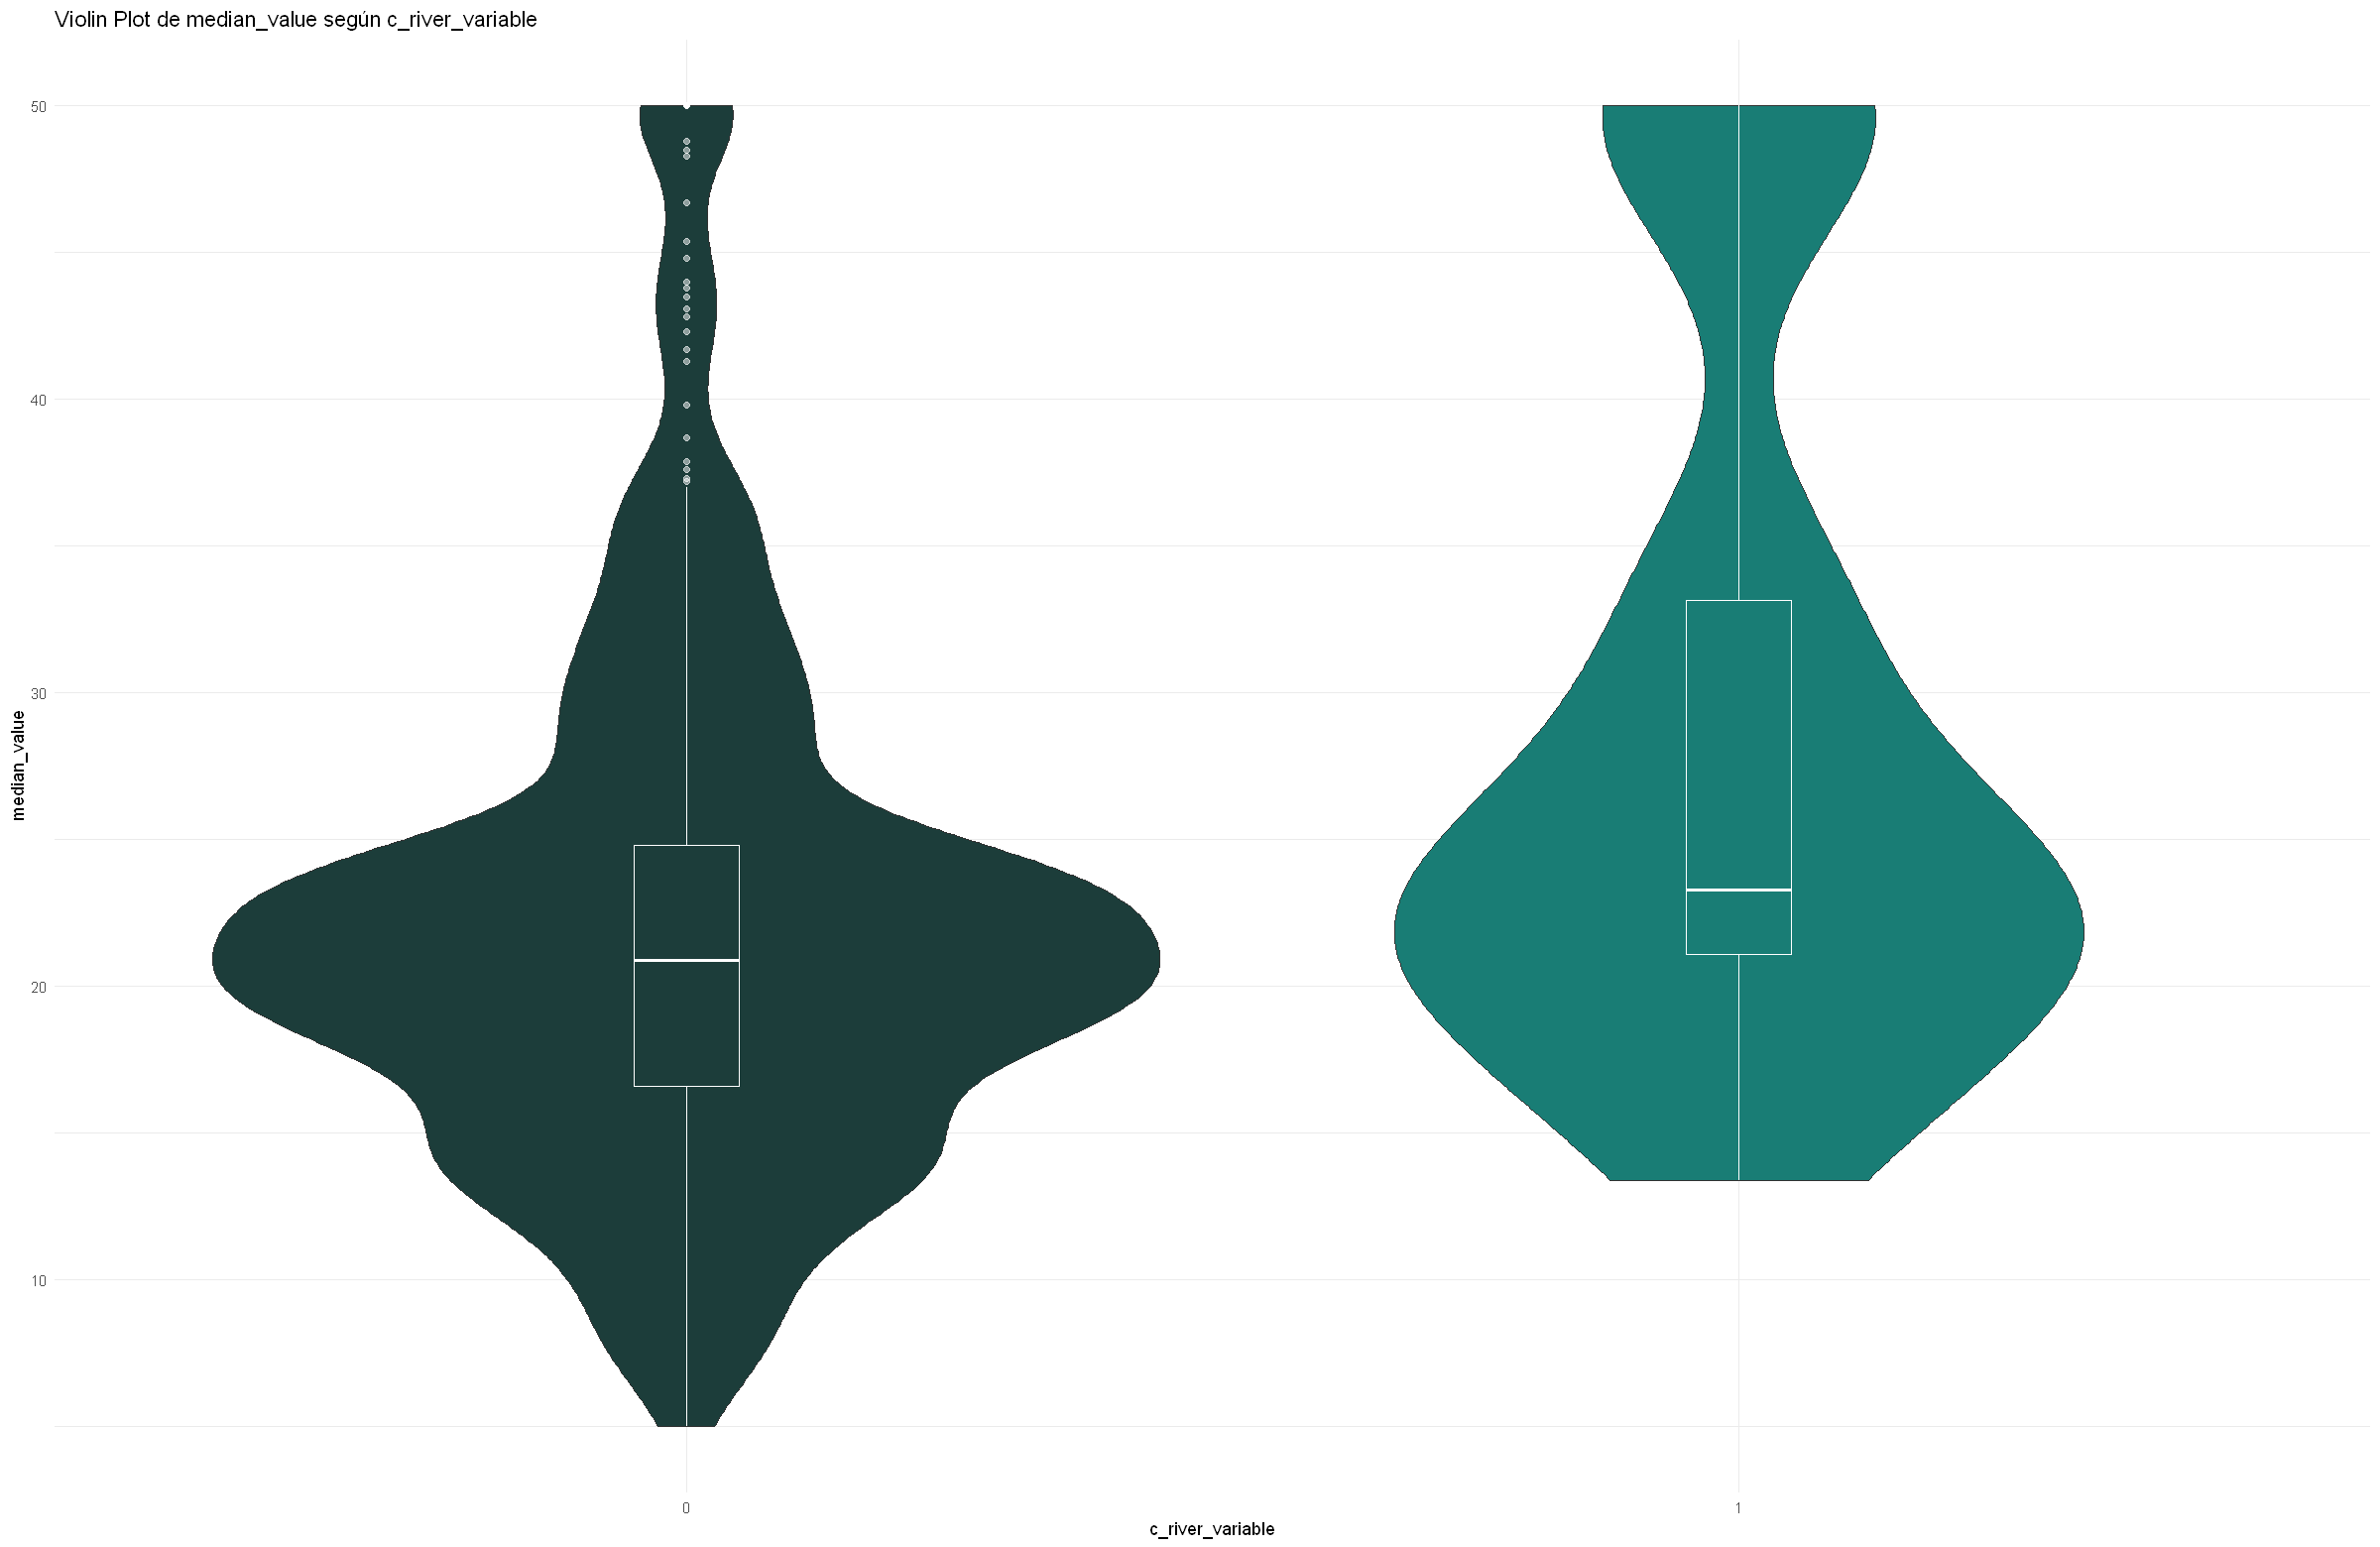

In [22]:
data3 <- data[, c('c_river_variable', 'median_value')]
data3$c_river_variable <- factor(data3$c_river_variable)

ggplot(data3, aes(x = c_river_variable, y = median_value, fill = c_river_variable)) +
  geom_violin() +
  geom_boxplot(width = 0.1, color = "white", alpha = 0.5) +
  labs(title = "Violin Plot de median_value según c_river_variable",
       x = "c_river_variable",
       y = "median_value") +
  theme_minimal() +
  theme(legend.position = "none") +
  scale_fill_manual(values = rev(c("#197D75", '#1C3D3A')))

####
En el analisis grafico podemos observar que, hay una diferencia muy grande en las distribuciones por c_river_variable para median_value. Para poder confirmar su significatividad estadistica, debemos hacer un analisis ANOVA y ver si tenemos evidencia suficiente como para rechazar la hipotesis nula e indicar que hay una diferencia entre medias significativa.

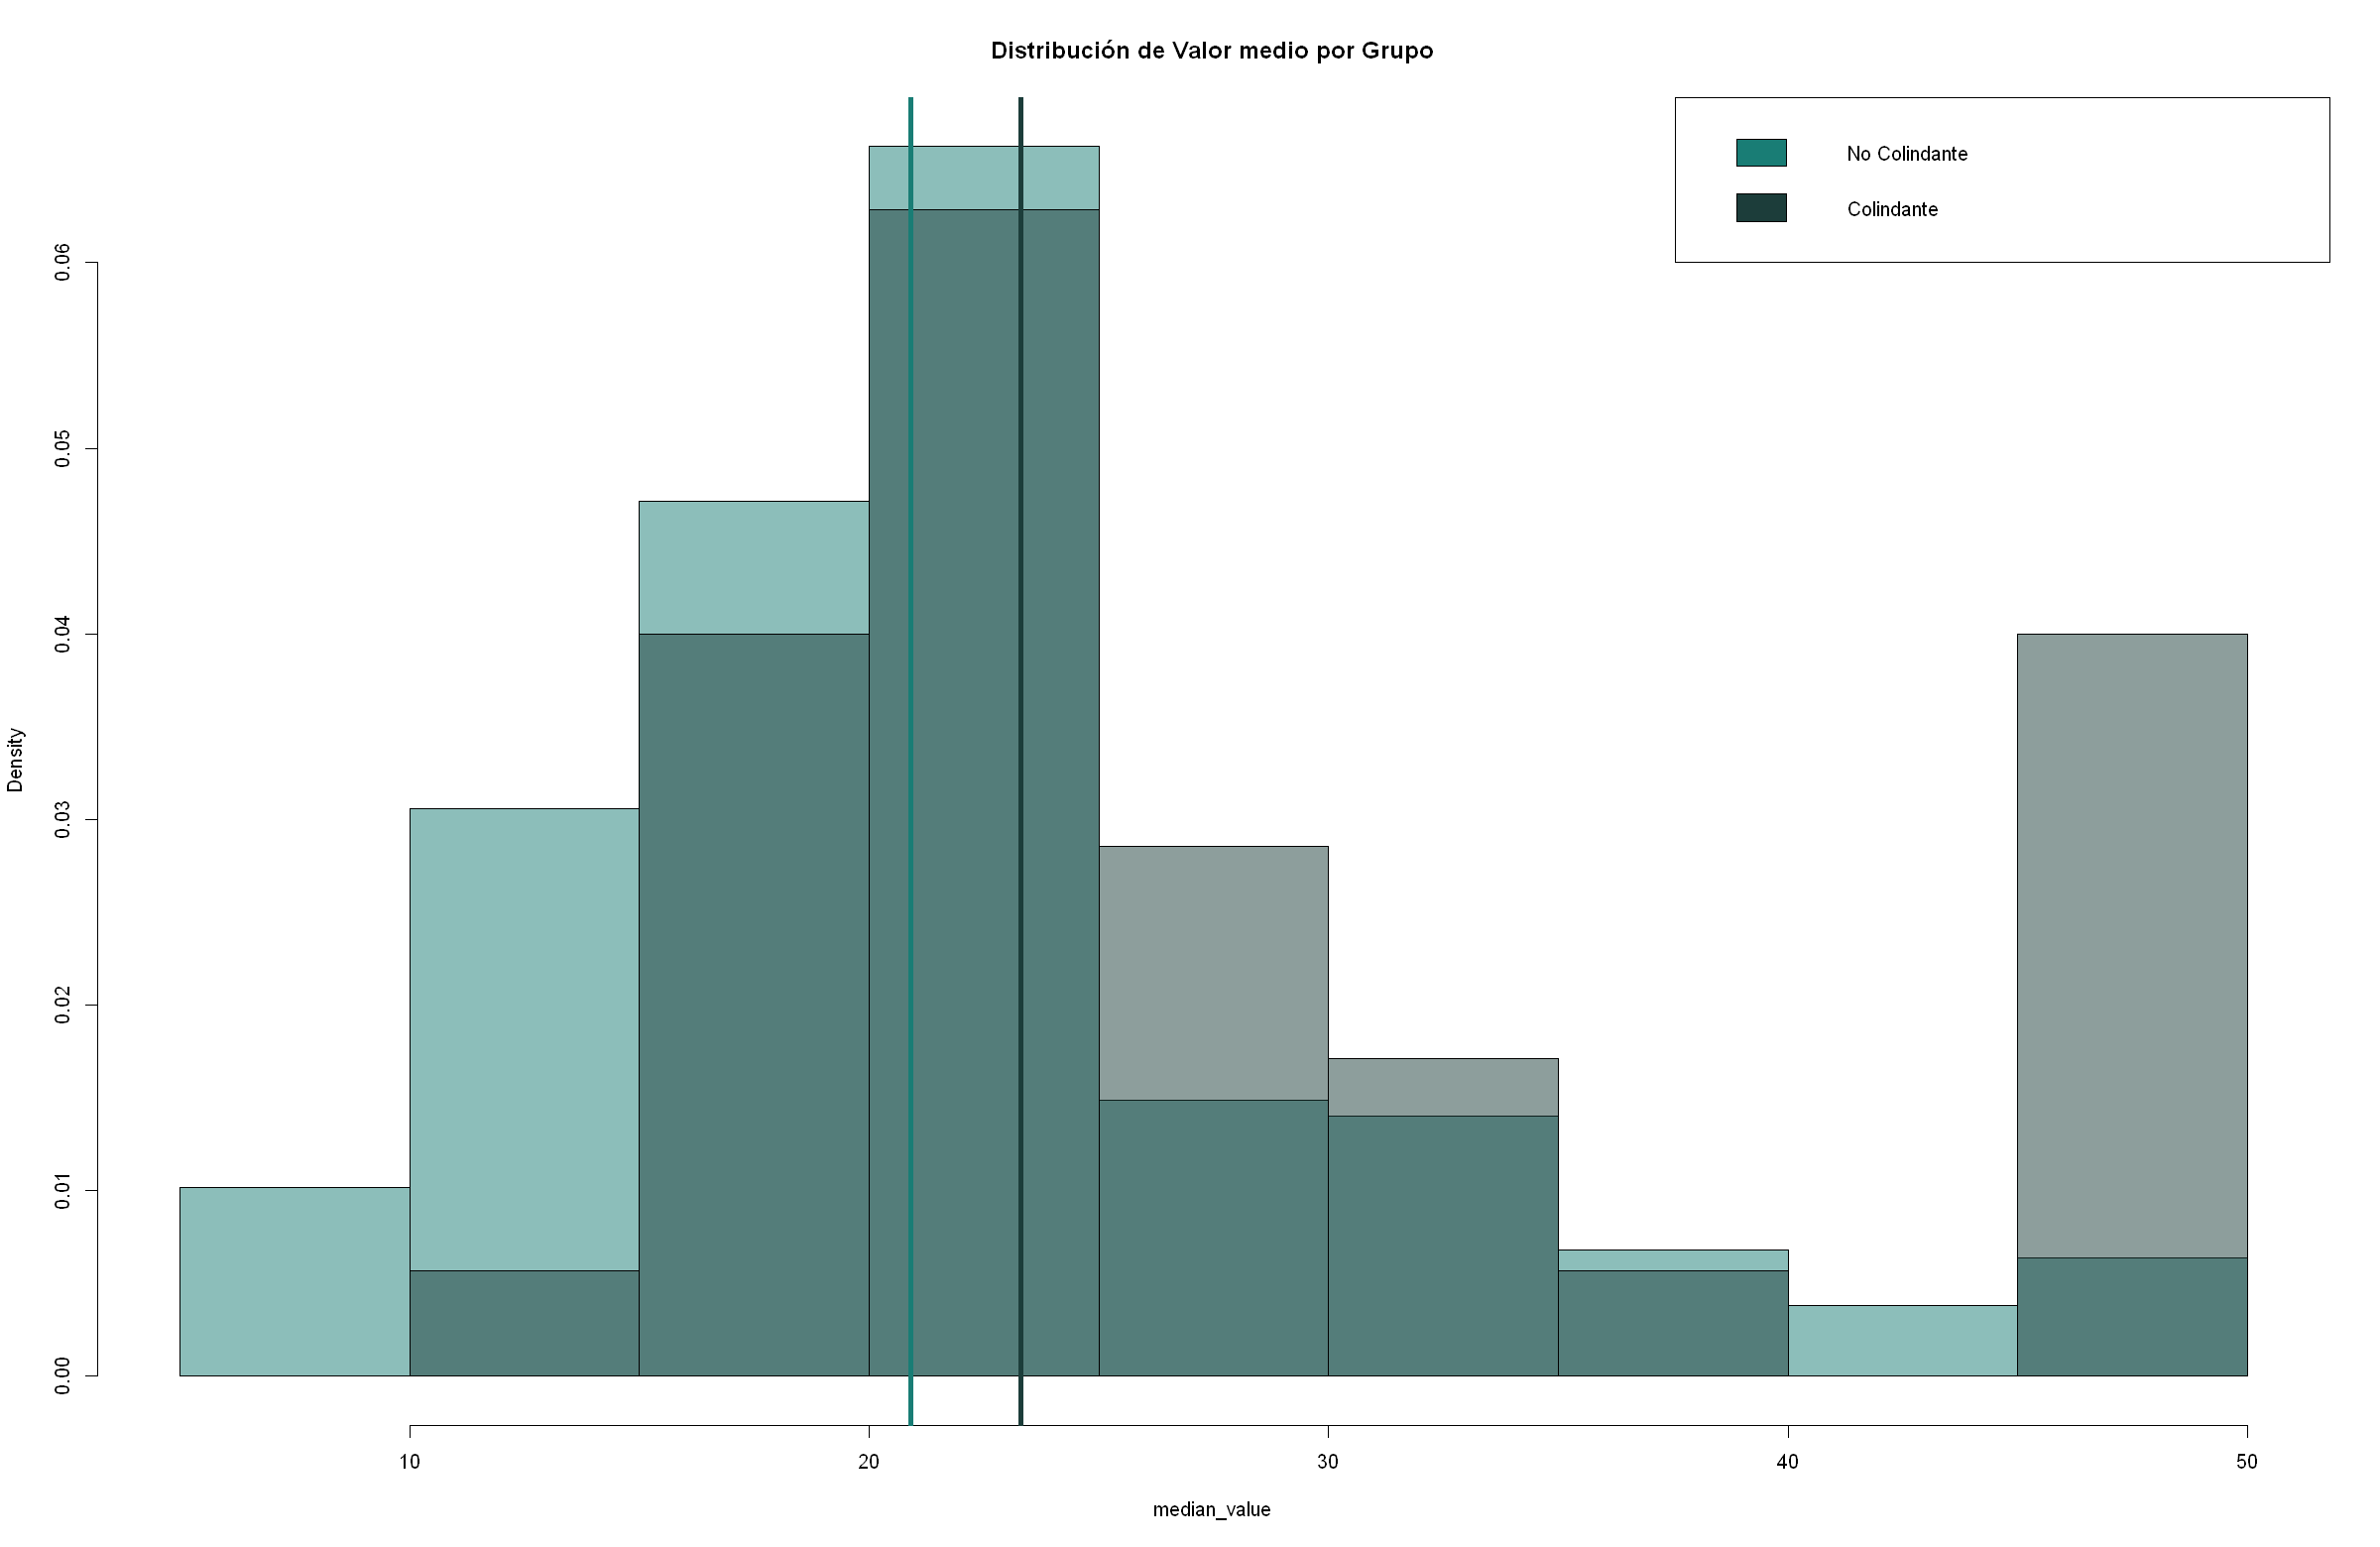

In [23]:
options(
  repr.plot.width = 20,  
  repr.plot.height = 13  
)

# Histograma probabilístico con la distribución 'median_value' por grupo 'sport'
hist(subset(data3, c_river_variable == '0')[,'median_value'],
     col = rgb(25/255, 125/255, 117/255, 0.5),
     main = 'Distribución de Valor medio por Grupo',
     freq = FALSE,
     xlab = 'median_value')
hist(subset(data3, c_river_variable == '1')[,'median_value'],
     col = rgb(28/255, 61/255, 58/255, 0.5),
     add = TRUE,
     freq = FALSE)

# Leyenda
legend(x = "topright", legend = c('No Colindante', 'Colindante'), fill = c('#197D75', '#1C3D3A'))

# Mediana 'median_value' por grupo
abline(v = median(subset(data3, c_river_variable == '0')[,'median_value']), col = rgb(25/255, 125/255, 117/255, 1), lwd = 4)
abline(v = median(subset(data3, c_river_variable == '1')[,'median_value']), col = rgb(28/255, 61/255, 58/255, 1), lwd = 4)



##### <font color='#197D75'>  3.3 ANOVA </font>

In [24]:
anova = aov(median_value ~ c_river_variable, data = data3)
summary(anova)

                  Df Sum Sq Mean Sq F value   Pr(>F)    
c_river_variable   1   1312  1312.1   15.97 7.39e-05 ***
Residuals        504  41404    82.2                     
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

#####
Este resultado nos indica con un p-valor < 0.05 que  tenemos evidencia suficiente para rechazar nuestra hipótesis nula y por lo tanto  podemos decir que hay una diferencia significativa entre grupos al observar la variable continua y dependiente: 'median_value'. Con lo cual, incluiremos dentro de nuestro modelo predictivo la variable c_river_variable.

### <font color='#197D75'>  **4.Desarrollo y justificación de las variables** </font>

####
Luego de realizar un analisis de dominio y un psoterior analisis de correlaciones de las variables independientes con nuestra variable dependiente y luego, de las variables independientes entre si, identificamos que algunas las variables de mayor correlacion respecto a la variable objetivo tambien presentaban correlaciones entre sí. Por ejemplo, 'lower_status' muestra una alta correlación con muchas variables de independienets. En este contexto, no sería necesario incluir todas estas variables en nuestro modelo debido al riesgo de multicolinealidad. Por ende, decidimos retener únicamente 'lower_status' dado su alto valor de correlación absoluto con nuestra variable dependiente. En resumen, nuestro analisis de correlaciones nos sugiere quedarnos con: 'lower_status' y 'teacher_ratio'.

Adicionalmente, hemos realizado un análisis de componentes principales (PCA), en el cual observamos que nuestra varianza poseia un alto nivel de explicacion recien en el componente 5. Sin embargo, este nos sugiere incorporar al modelo de estimacion las variables que estan altamente correlacionadas con 'lower_status', para no caer en un error de multicolinealidad, y como esto no aporto una mayor reduccion de variables, decidimos proceder a quedarnos con las variables mencionadas previamente.  

Ademas, realizamos un analisis de la varianza (ANOVA) para validar y respaldar nuestra selección de variables categoricas. En principio habiamos observados algunos resultados que nos parecian interesantes evaluar respecto a nuestra variable c_river_variable, pero cuando analizamos la correlacion no encontramos un valor alto. Sin embargo, decidimos guardar la variable para estudiarla con mayor profundidad en un analisis de varianza. Este ultimo nos indico que hay una diferencia de valores medio respecto a si la vivienda es colindante o no colindante al rio. Con lo cual, hemos decidido incluirla en nuestro modelo. 

En conjunto, estas estrategias fortalecen nuestra elección de variables para construir un modelo predictivo preciso y robusto. Nuestro modelo que intentara predecir median_value queda definido por las siguientes variables: 'c_river_variable', 'lower_status' y 'teacher_ratio'.

### <font color='#197D75'>  **5. Estimación y Evaluación del Modelo:** </font> 

###### <font color='#197D75'>  5.1 Modelo lineal multiple </font> 

In [25]:
# Variables seleccionadas por PCA:
data_final <- data.frame(
  median_value = data$median_value,
  c_river_variable = data$c_river_variable,
  lower_status = data$lower_status,
  teacher_ratio = data$teacher_ratio
)

set.seed(123)
inTrain <- createDataPartition(
  y = data_final$median_value,
  p = 0.7,
  list = FALSE,
  times = 1
) 

# Creamos una partición aleatoria de los datos para usar el 70% como train y el 30% como test

data_train <- data_final[inTrain, ] #separamos los datos según esta partición
data_test <- data_final[-inTrain, ]

modelo_lm <- lm(
  median_value ~ c_river_variable + lower_status + teacher_ratio, 
  data = data_train
) 

# Entrenamos el modelo
summary(modelo_lm)


Call:
lm(formula = median_value ~ c_river_variable + lower_status + 
    teacher_ratio, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.2721  -3.4298  -0.8608   1.9118  22.7811 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      52.20016    2.67580  19.508  < 2e-16 ***
c_river_variable  3.88769    1.17265   3.315  0.00101 ** 
lower_status     -0.79663    0.04574 -17.418  < 2e-16 ***
teacher_ratio    -1.07895    0.15251  -7.075 8.15e-12 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.597 on 352 degrees of freedom
Multiple R-squared:  0.6182,	Adjusted R-squared:  0.6149 
F-statistic:   190 on 3 and 352 DF,  p-value: < 2.2e-16


#### <font color='#197D75'>  5.2 Comprobamos los supuestos </font>

##### <font color='#197D75'>  5.2.1 Normalidad </font>


	Shapiro-Wilk normality test

data:  modelo_lm$residuals
W = 0.91682, p-value = 3.938e-13



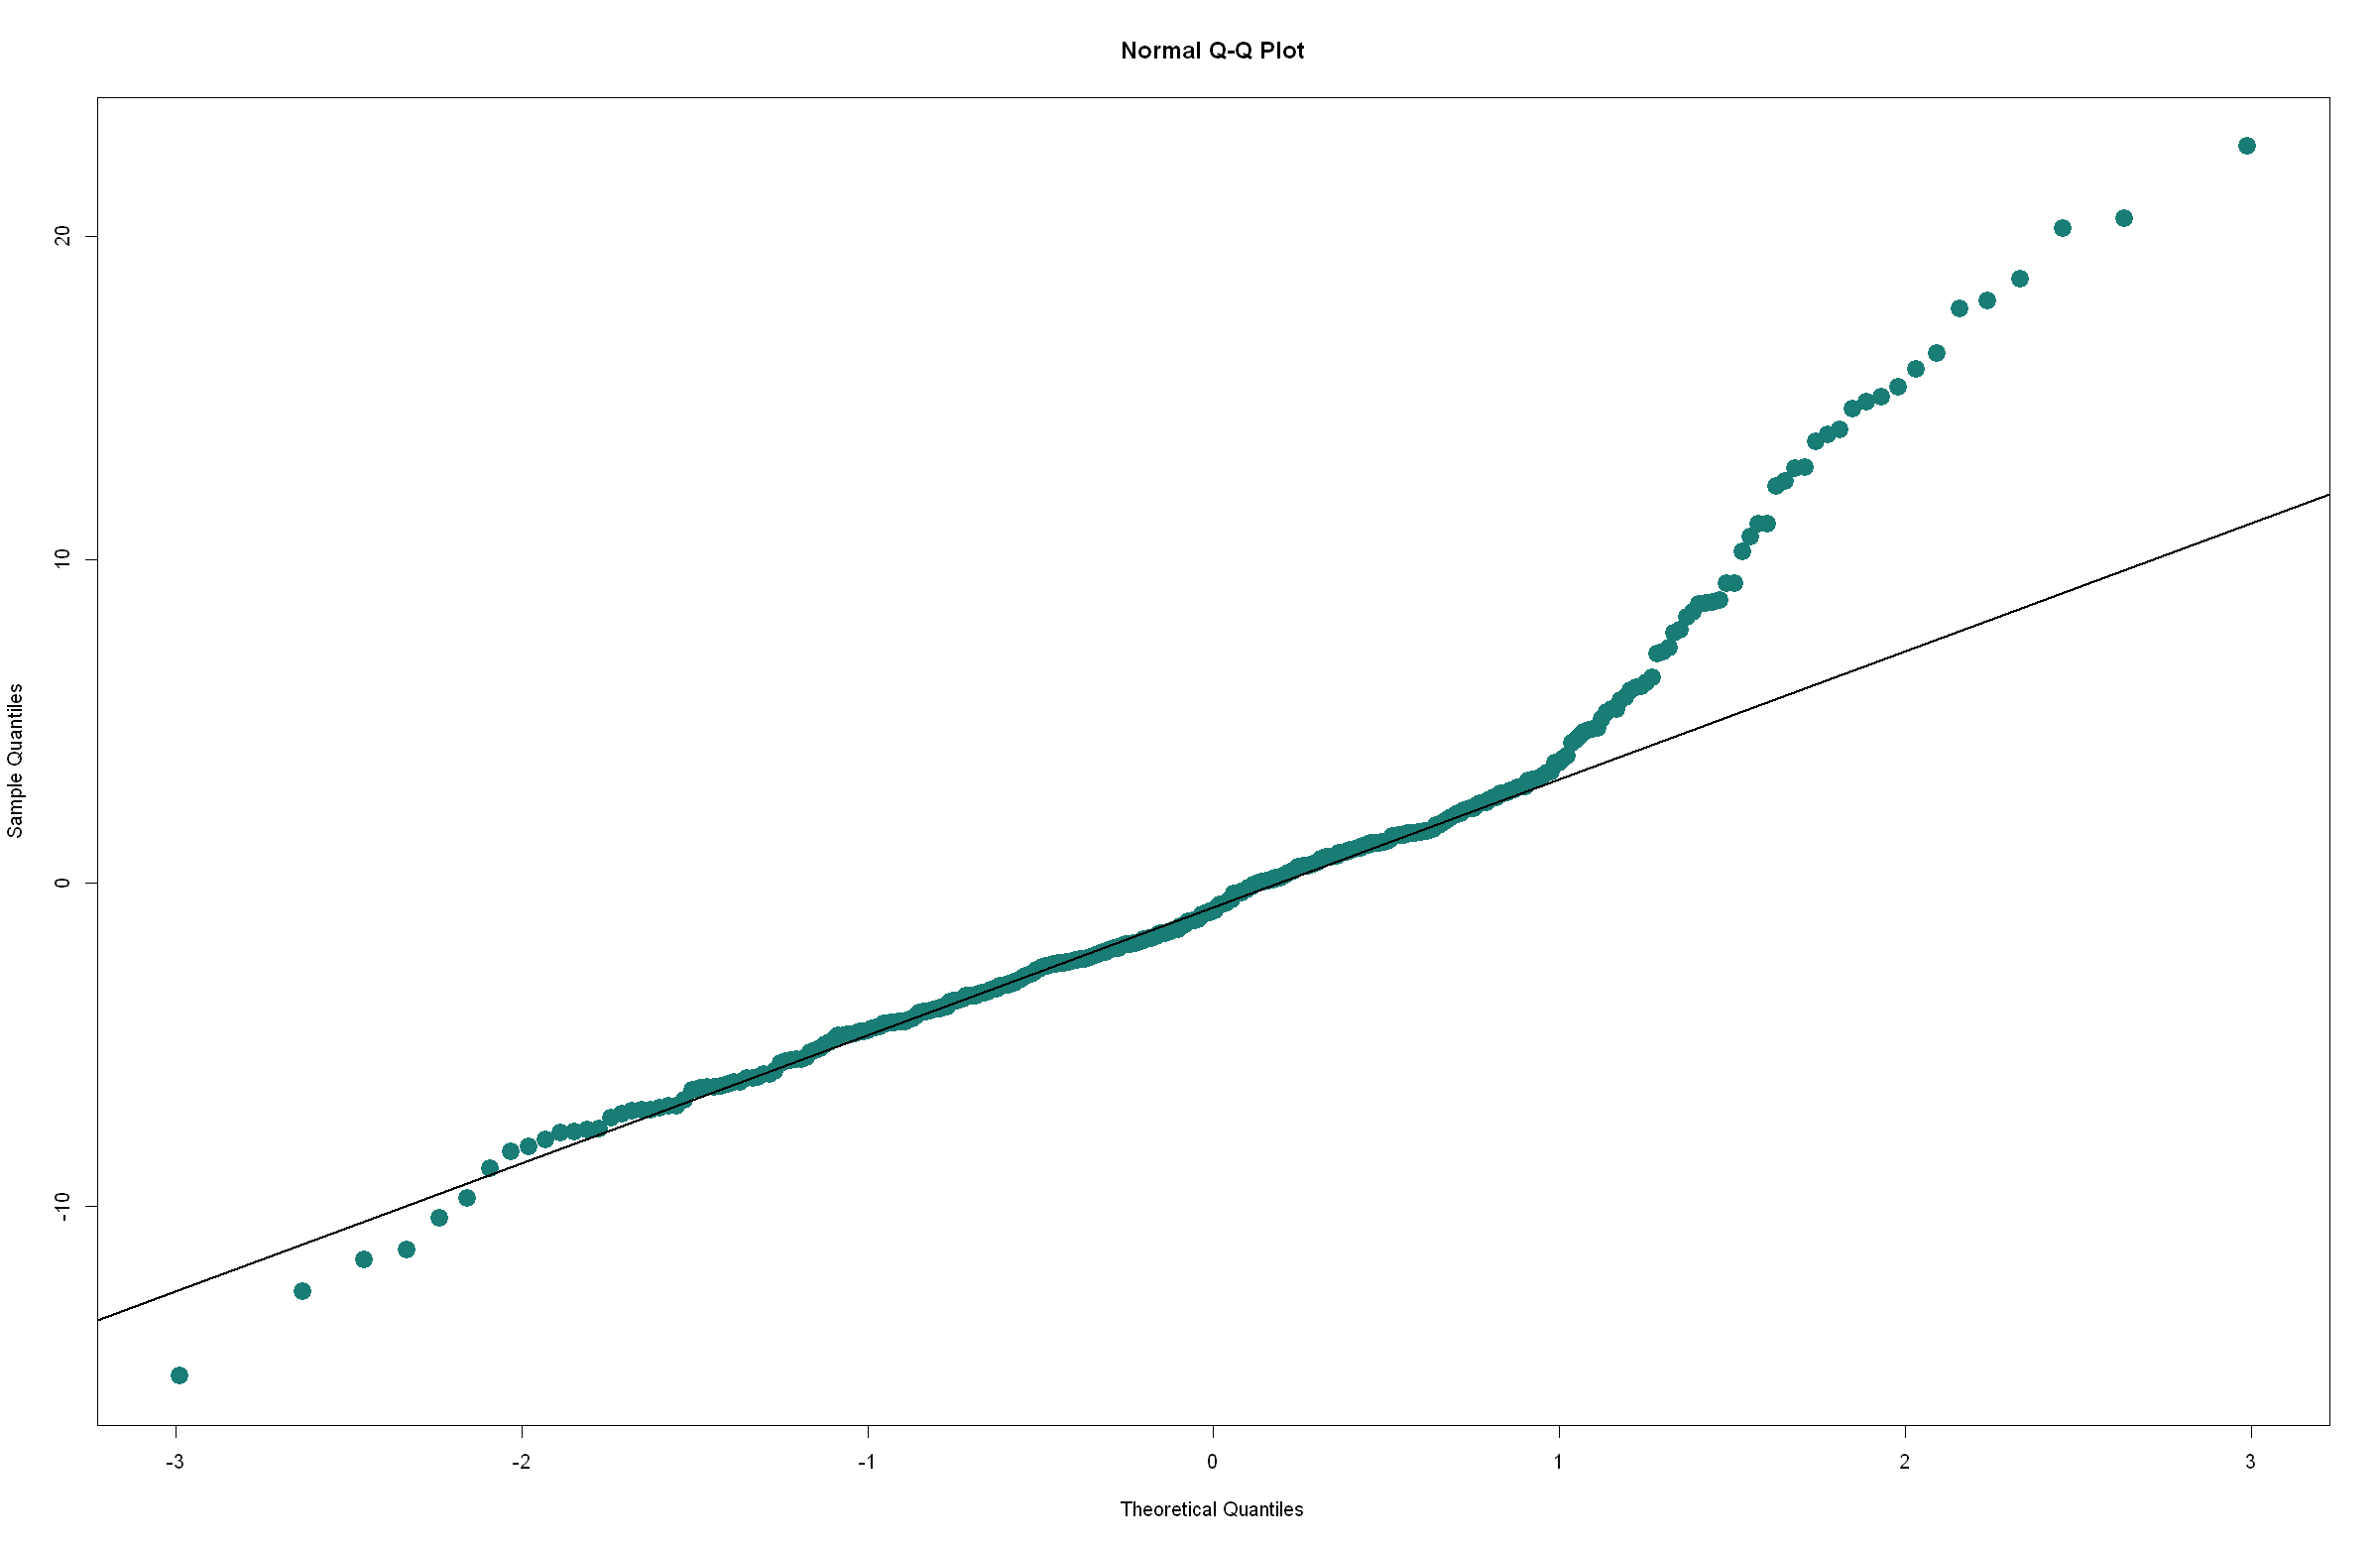

In [26]:
# QQplot
qqnorm(modelo_lm$residuals, pch = 19, col = "#197D75", cex = 2)
qqline(modelo_lm$residuals, col = "black", lwd = 2)  

# Realizamos el test de Shapiro
shapiro_test <- shapiro.test(modelo_lm$residuals)
print(shapiro_test)


El resultado nos da que no podemos rechazar la hipotesis nula de normalidad, con lo cual cumple con el supuesto

##### <font color='#197D75'>  5.2.2 Heterocedasticidad </font>


	studentized Breusch-Pagan test

data:  modelo_lm
BP = 32.385, df = 3, p-value = 4.342e-07


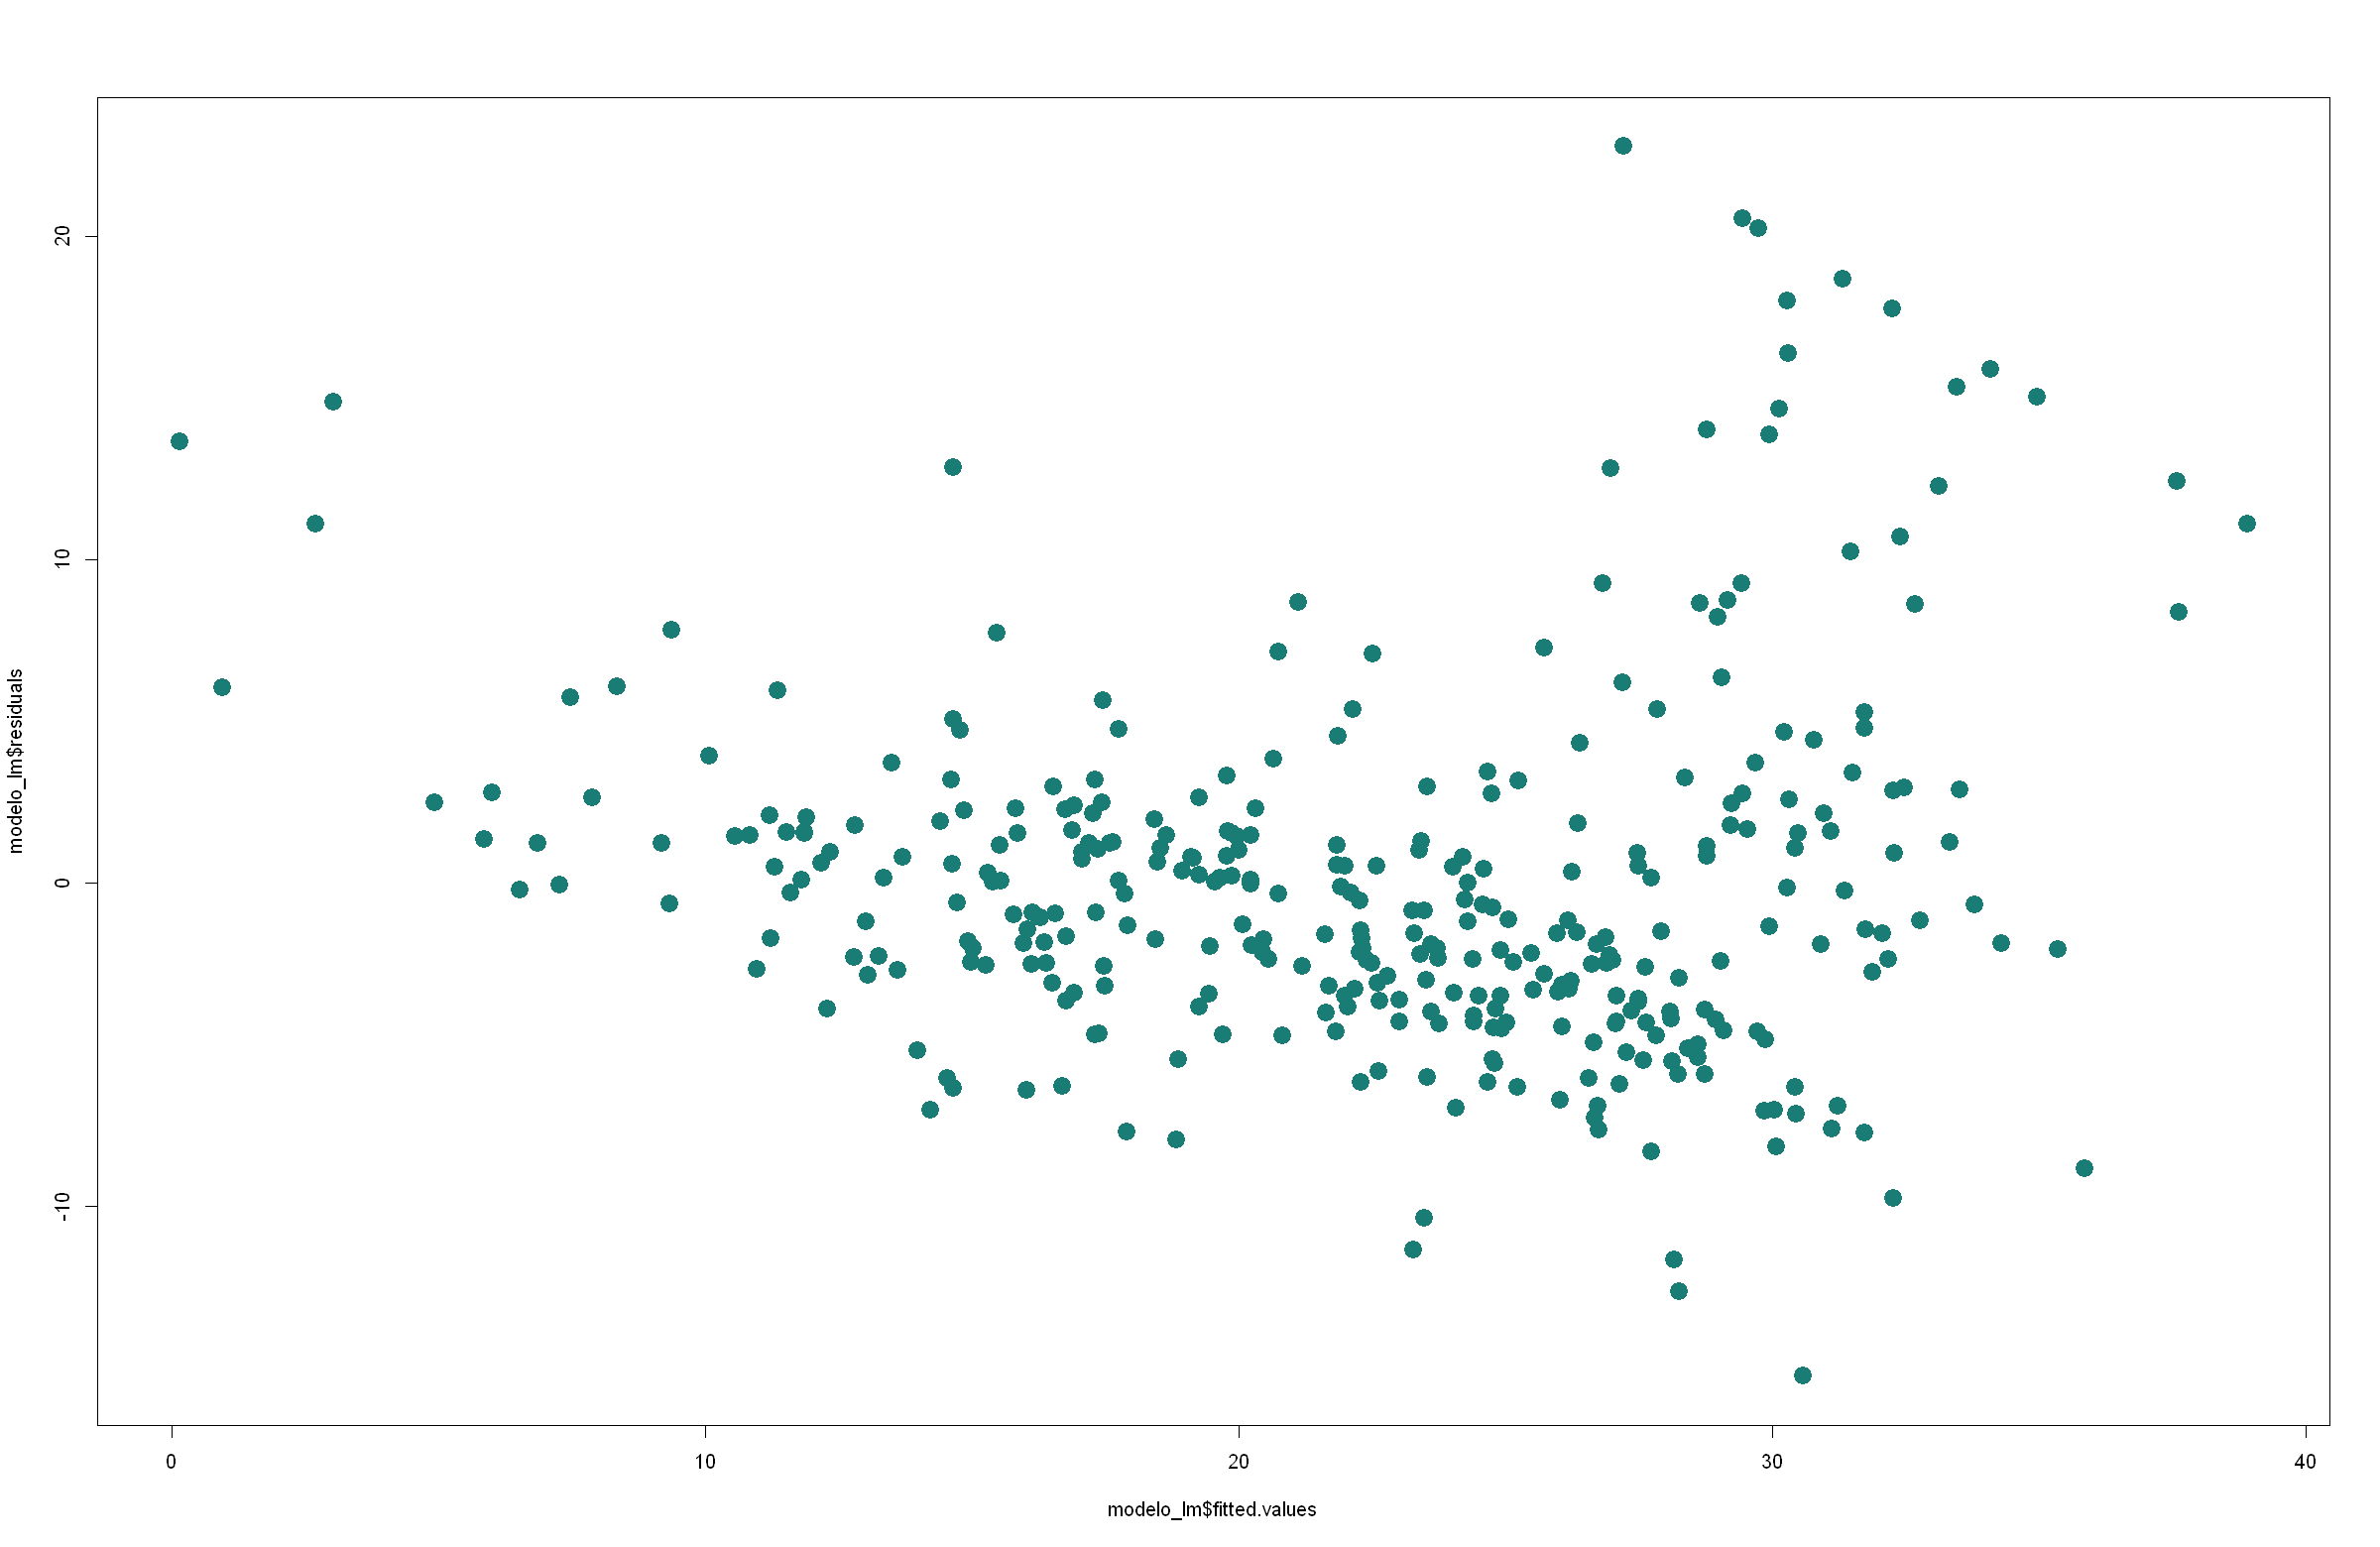

In [27]:
# Visualization
plot(modelo_lm$fitted.values , modelo_lm$residuals , pch =19,col ="#197D75", cex=2 )

# Test Breusch-Pagan
bptest(modelo_lm)

Dado que el p-valor es menor que el nivel de significancia de 0.05, tenemos evidencia suficiente para rechazar la hipotesis nula de que los residuos del modelo son homocedasticos.

##### <font color='#197D75'>  5.2.3 Autocorrelacion </font>


	Durbin-Watson test

data:  modelo_lm
DW = 1.1416, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is not 0


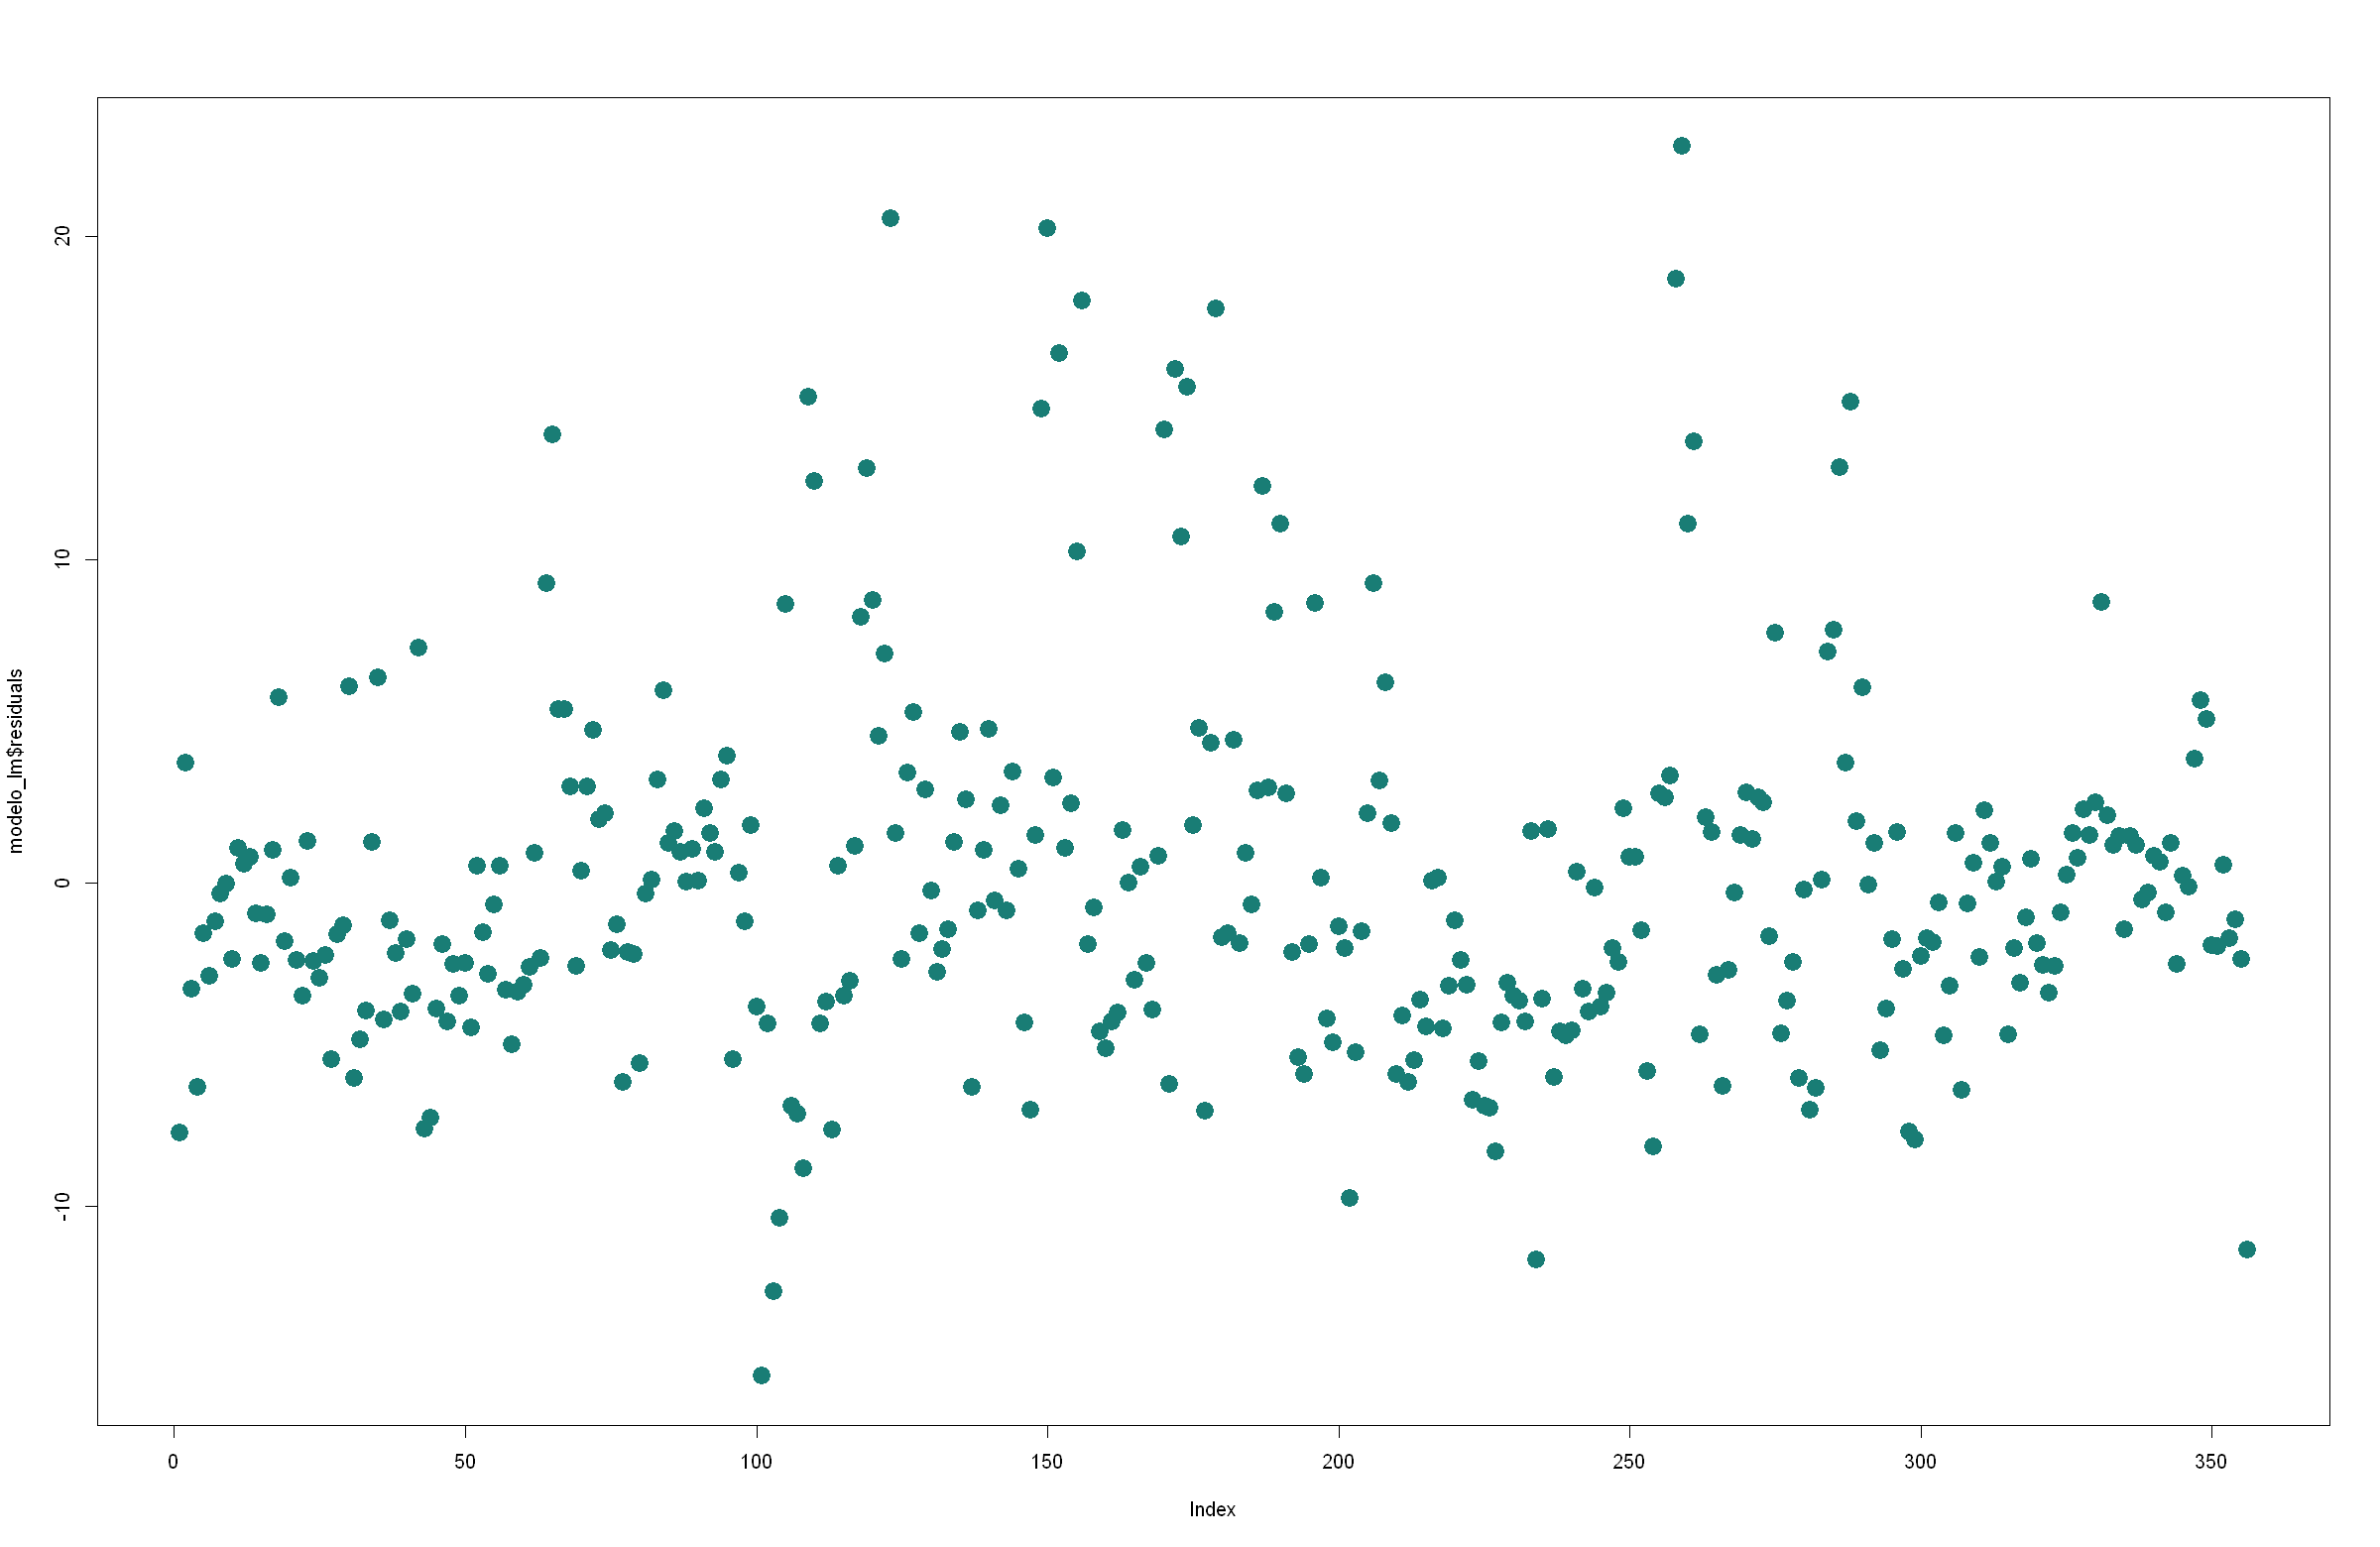

In [28]:
# Visualization
plot(modelo_lm$residuals, pch = 19, col = "#197D75", cex = 2)

# Statistical Test
dwtest(modelo_lm, alternative = "two.sided")

Nuestros residuos no tienen autocorrelacion, es decir, son independientes.

##### <font color='#197D75'>  5.2.4 Media de errores </font>

In [29]:
mean(modelo_lm$residuals)

[1] 2.467303e-16

##### <font color='#197D75'>  5.2.5 Deteccion de Outliers </font>

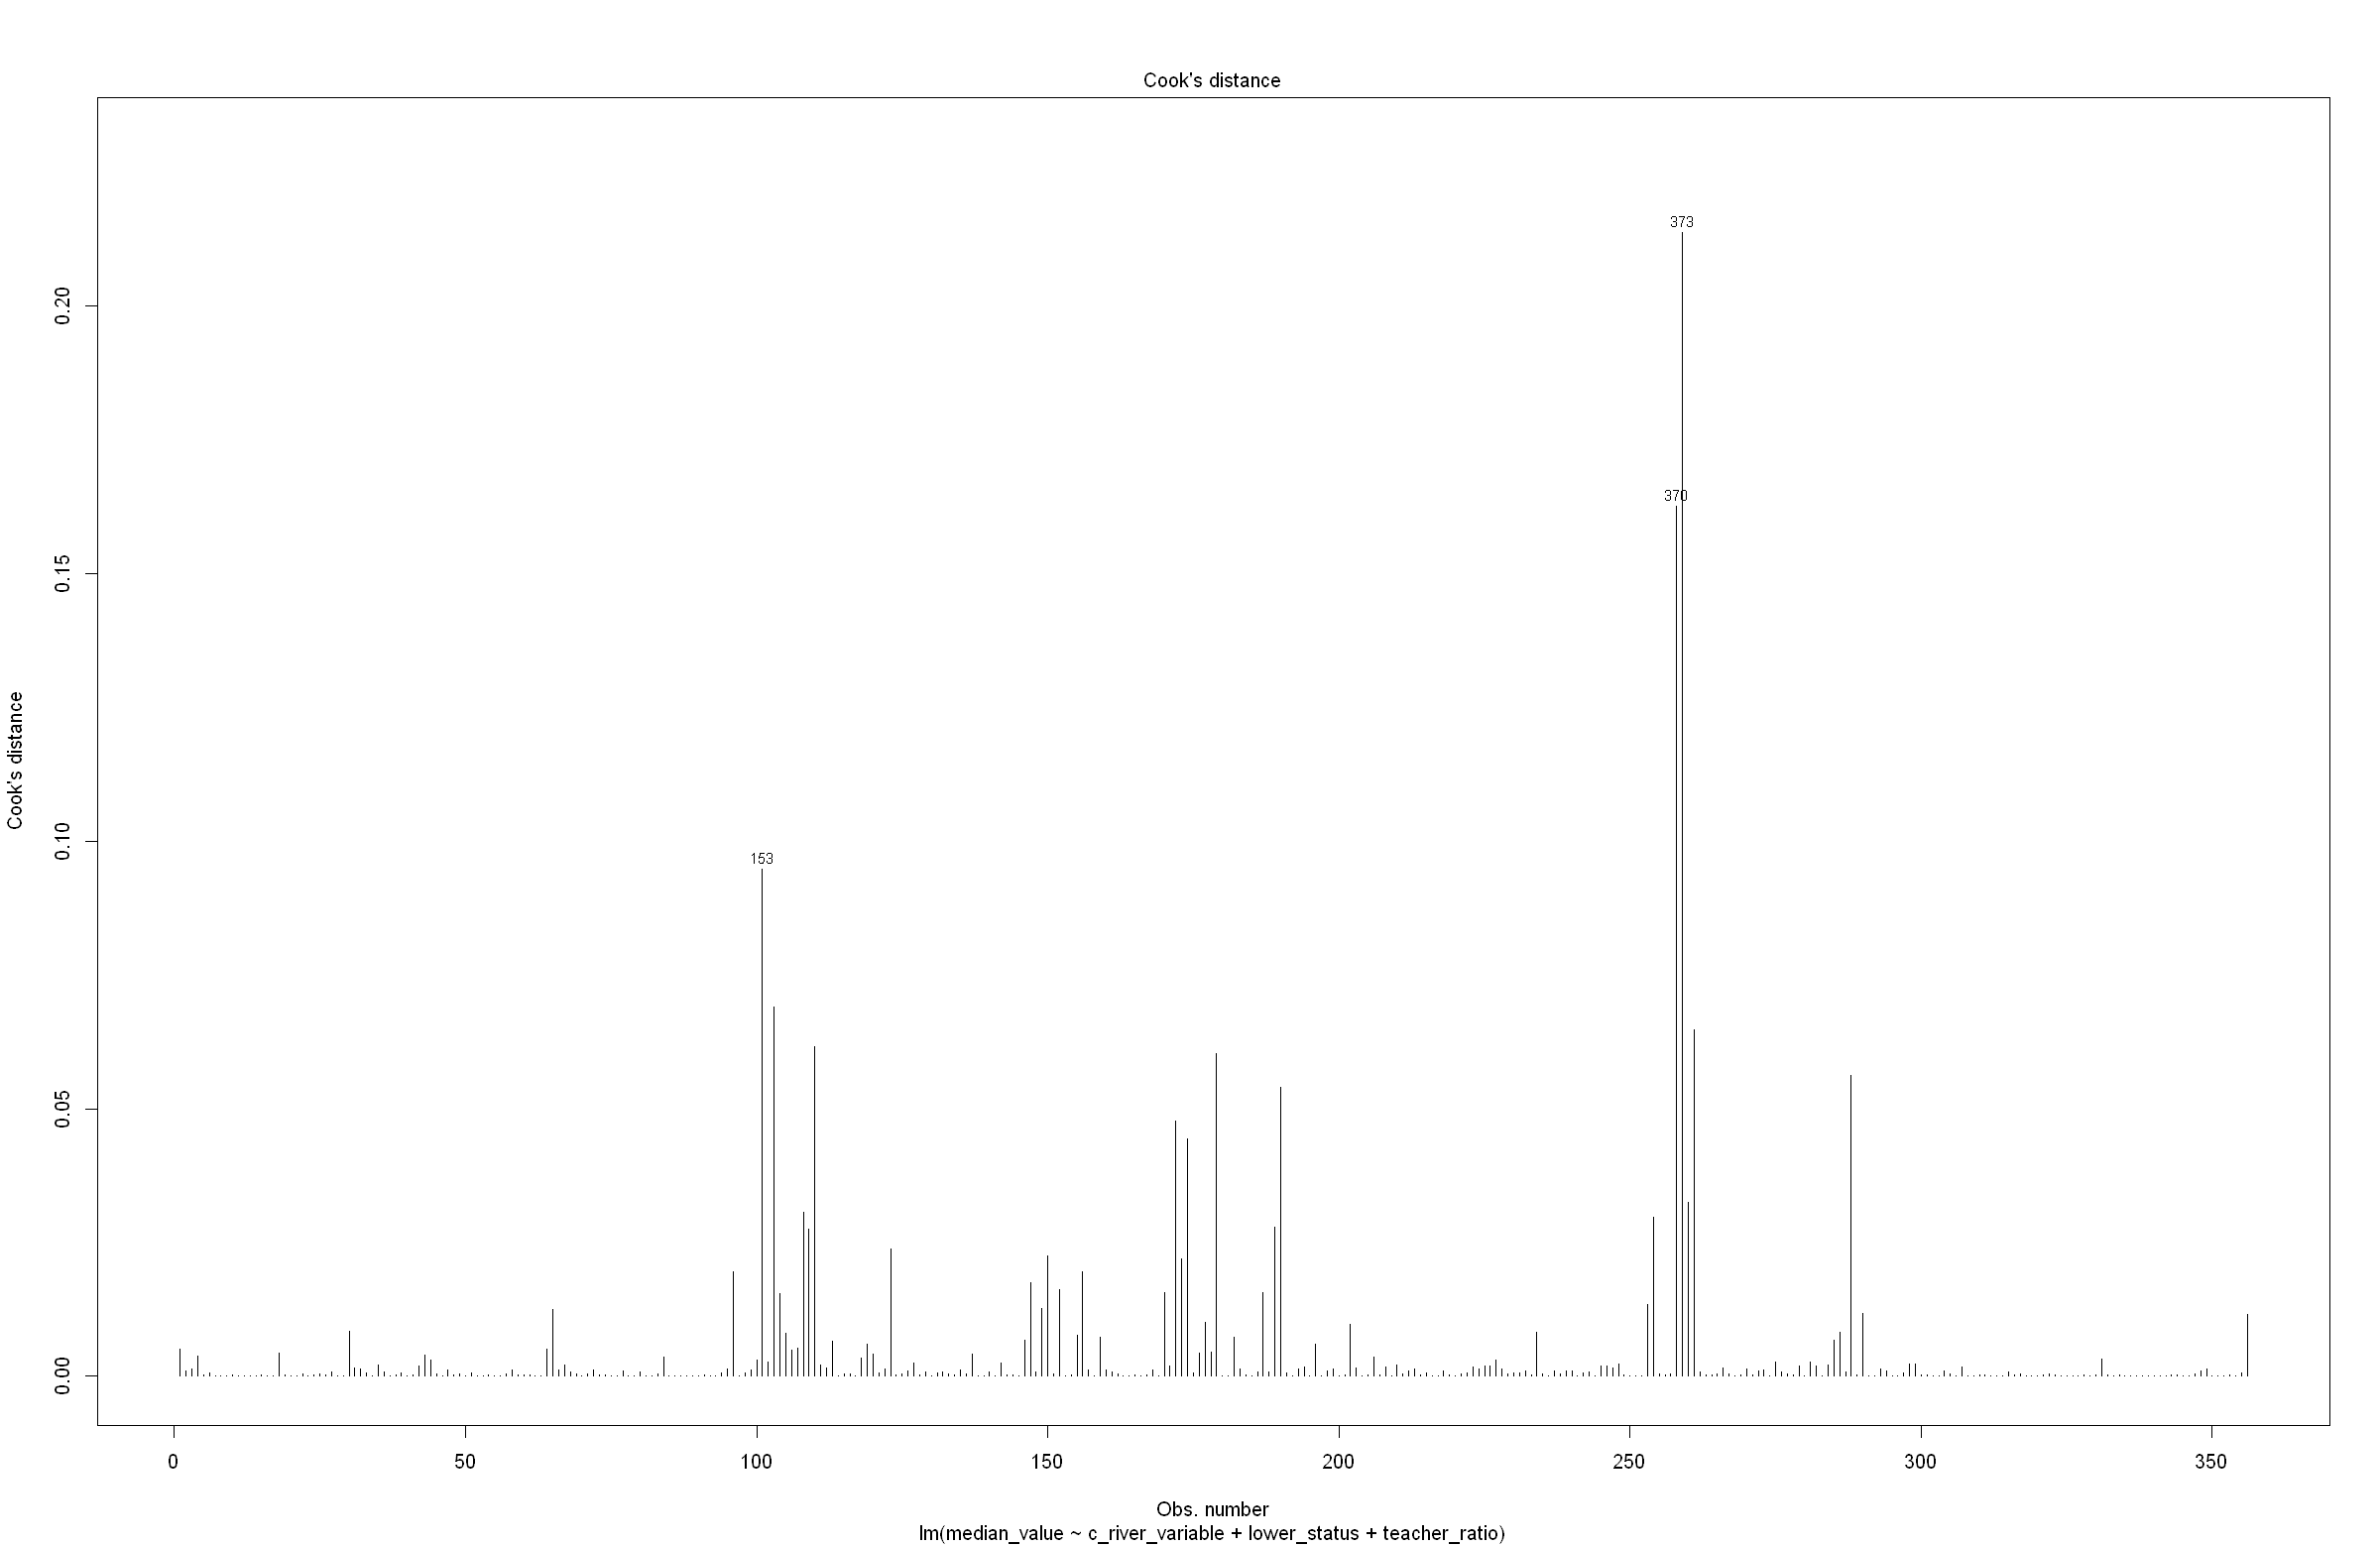

In [30]:
# Visualization (Cook's distance plot)
plot(modelo_lm , 4)

#### <font color='#197D75'>  5.3 Predicciones </font>

R2,RMSE,MAE
<dbl>,<dbl>,<dbl>
0.621705,5.93651,4.040765


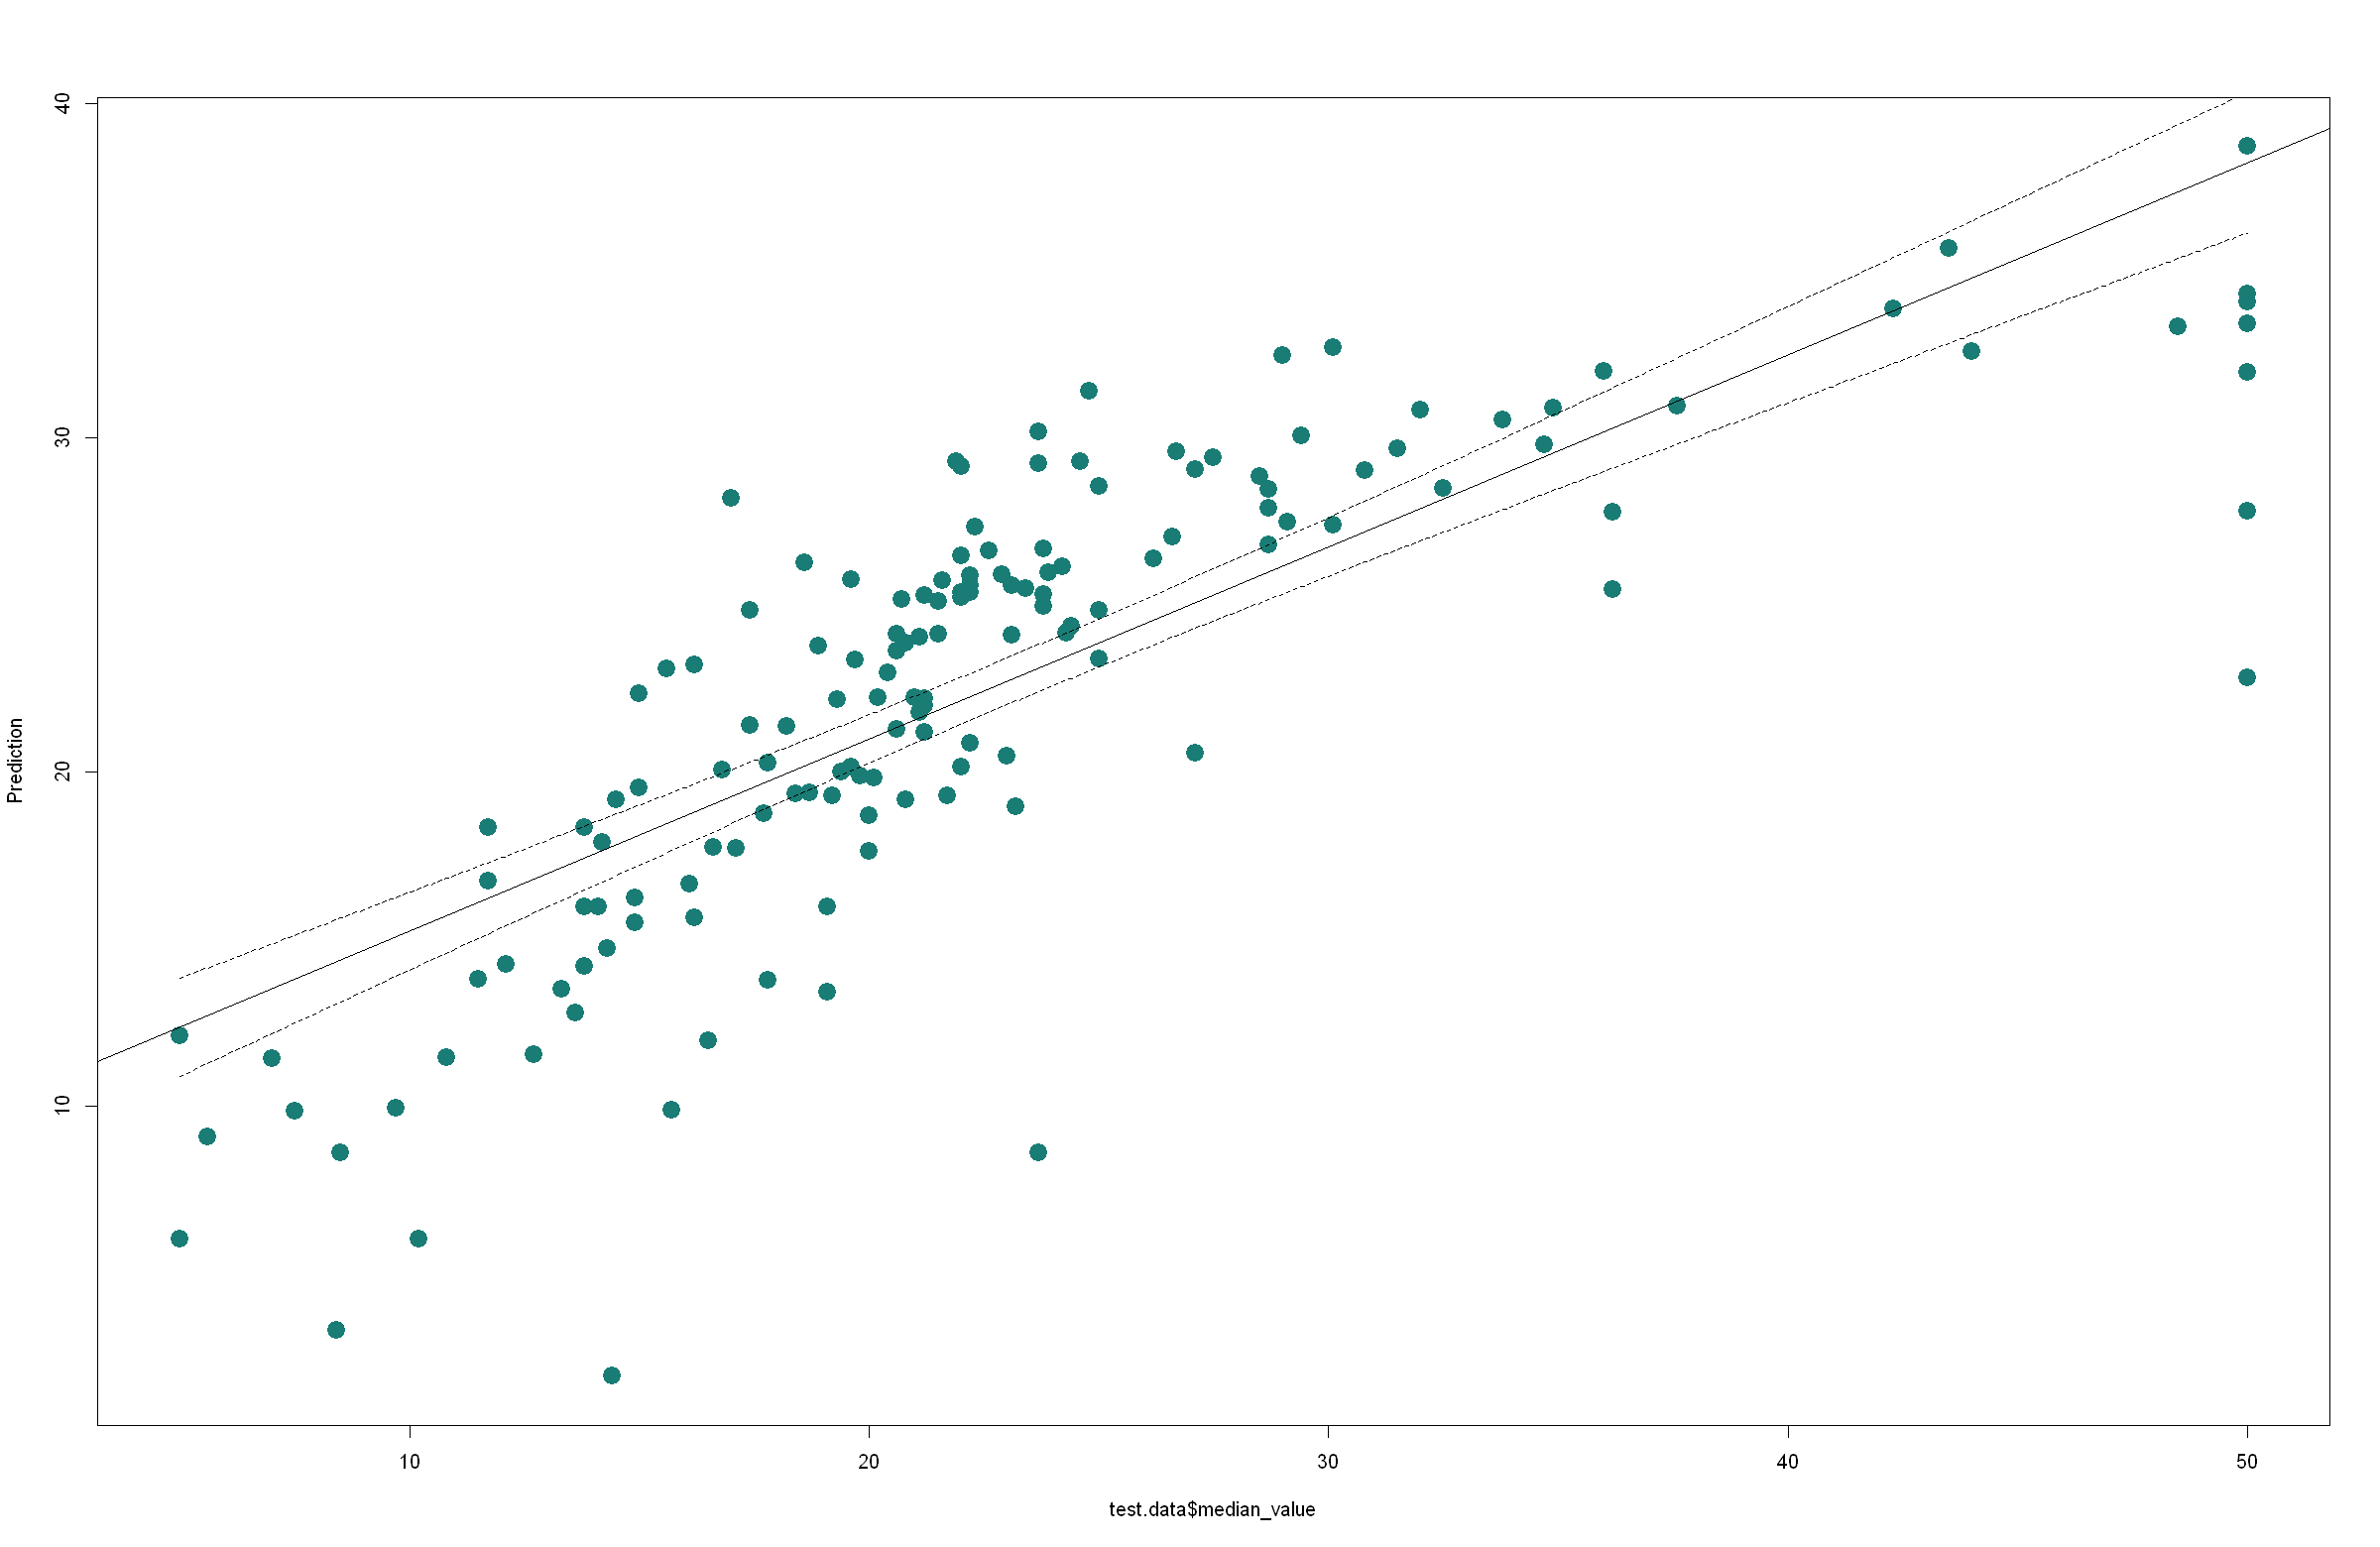

In [31]:
# Making prediction
prediction = predict(modelo_lm, data_test)

### Visualization
plot(data_test$median_value, prediction, xlab="test.data$median_value", ylab="Prediction", pch =19,col ="#197D75", cex=2)

#add fitted regression line
lm.out = lm(prediction ~ median_value, data = data_test)
newx = seq(min(data_test$median_value),max(data_test$median_value),by = 0.05)
conf_interval = predict(lm.out, newdata=data.frame(median_value=newx), interval="confidence", level = 0.95)
abline(lm.out, col = "black")

#add conf_interval lines
lines(newx, conf_interval[,2], col="black", lty=2)
lines(newx, conf_interval[,3], col="black", lty=2)

# Statistical Measure
data.frame( R2 = R2(prediction, data_test$median_value),
            RMSE = RMSE(prediction, data_test$median_value),
            MAE = MAE(prediction, data_test$median_value))

### <font color='#197D75'>  **6. Conclusion** </font>

Al examinar la capacidad predictiva de nuestro modelo, observamos un coeficiente de determinación (R2) aproximado de 0.62. Este valor sugiere que el modelo explica alrededor del 62% de la variable objetivo. Esta capacidad predictiva no es optima.

Al profundizar en nuestras predicciones, notamos que la mayoría de ellas caen fuera del intervalo de confianza establecido. Este hallazgo subraya la necesidad de tener una mayor prudencia en relación con los otliers de nuestra variable objetivo. Estos valores atipicos podrian indicar la existencia de una categoría de viviendas que puede no seguir las relaciones esperadas con las variables independientes que hemos considerado. Si bien nos hemos basado en resultados estadisticos y teoricos, puede darse que al no conocer del todo el dominio que estamos analizando, se nos escape como tratar alguna variable particular. Es por esta razon que a lo largo del ejercicio fuimos planteando ciertos supuestos respecto al campo de estudio.

El analisis de la varianza (ANOVA), nos ha permitido investigar como impacta la condicion colindante respecto al rio en el precio medio de la vivienda. Hemos visto, que hay una variacion en la misma. Aqui es importante remarcar dos factores. El primero de ellos es que a pesar de no tener una correlacion suficientemente grande en terminos absolutos con nuestra variable target, vimos que impacta de manera distinta la distribucion por categorias. Esto nuevamente puede ir en linea con el desconocimiento del dominio (area geografica estudiada), ya que como dijimos, pueden existir categorias de viviendas que no se correspondan con las variables independientes planteadas (como por ejemplo, zona de hoteles u oficinas).

En cuanto a nuestro analisis de PCA aunque no parece haber proporcionado una reduccion significativa de variables en comparacion con nuestras consideraciones iniciales basadas en correlaciones, podría ser util reconsiderar la inclusion de las variables identificadas por el PCA como importantes para la variabilidad del modelo. Este paso adicional podria ayudarnos a abordar las limitaciones percibidas en nuestro enfoque anterior y mejorar la calidad general del modelo. Aunque se me presentaria una contradiccion teorica respecto a la multicolinealidad, que deberia estudiar con mayor profundidad. 

Como conclusion de este ejercicio, seria prudente revisar la naturaleza de los outliers en nuestra variable objetivo y considerar si pueden surgir nuevas categorías de viviendas que requieran un tratamiento diferente en el modelo. Ademas, podriamos explorar mas a fondo las relaciones entre nuestras variables independientes, ya que notamos correlaciones significativas entre varias de ellas. Sumando a esto, para comprender aún más la relación entre las variables independientes y su impacto en "median_value", podriamos llevar a cabo un análisis de interacciones. Investigamos la significatividad de las interacciones entre variables, explorando cómo su combinación puede afectar de manera conjunta a la variable objetivo. La selección de solo una variable de un conjunto correlacionado puede no ser suficiente y podría ser beneficioso revisar este paso para mejorar la representacion del modelo.